## Contents

### [1. Introduction](#1)
 - #### [1.1 Data](#1.1)
 - #### [1.2 Motivation](#1.2)
 - #### [1.3 Questions](#1.3)

### [2. Prepare the data analysis](#2)
 - #### [2.1 Load Packages and Data](#2.1)
 - #### [2.2 Check the Data](#2.2)
 - #### [2.3 Preprocess the Data](#2.3)

### [3. Exploratory Data Analysis (EDA)](#3)
 - #### [3.1 Q1 Are values of automatic features affect the popularity of songs?](#3.1)
 - #### [3.2 Q2 Is there a correlation between the values of different attributes of songs?](#3.2)
 - #### [3.3 Q3 What are the characteristics of the Top 500 (popularity) songs'lyrics on Spotify?](#3.3)
 - #### [3.4 Q4 Do different music genres have different vocal characteristics?](#3.4)
 - #### [3.5 Q5 Who are the most popular artists among 18,000 songs on Spotify?](#3.5)
 - #### [3.6 Q6 Can features be used to predict the popularity of music?](#3.6)

### [4. Conclusion](#4)

**———————————————————————————————————————————————————————————————————————**

#   

#   

<a id='1'></a>
## 1. Introduction

<a id='1.1'></a>
### 1.1 Data

This dataset contains various types of information over more that 18000 Spotify songs including, artist, album, audio features (e.g. loudness), lyrics, the language of lyrics, genres and sub-genres.(from https://www.kaggle.com/datasets/imuhammad/audio-features-and-lyrics-of-spotify-songs)

<a id='1.2'></a>
### 1.2 Motivation

Music is necessary and ubiquitous in almost everyone’s daily life. But people generally don't know why they are touched by music. We wondered if there were some common characteristics behind popular songs contributing to their attractiveness. 

<a id='1.3'></a>
### 1.3 Questions

- Q1 Are values of automatic features affect the popularity of songs?
- Q2 Is there a correlation between the values of different attributes of songs?
- Q3 What are the characteristics of the Top 500 (popularity) songs'lyrics on Spotify?
- Q4 Do different music genres have different vocal characteristics?
- Q5 Who are the most popular artists among 18,000 songs on Spotify?
- Q6 Can features be used to predict the popularity of music?

<a id='2'></a>
## 2. Prepare the data analysis

<a id='2.1'></a>
### 2.1 Load Packages and Data

In [1]:
# import packages
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os
import re
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
import nltk 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Perceptron #Perceptron
from sklearn.linear_model import LinearRegression #Linear regression
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #Support Vector Machines
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import pyLDAvis.gensim_models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.sklearn
init_notebook_mode(connected=True) #do not miss this line
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv('../data/spotify_songs.csv')
df.head(10)

track_id                                         track_name  \
0  0017A6SJgTbfQVU2EtsPNo                                           Pangarap   
1  004s3t0ONYlzxII9PLgU6z                                       I Feel Alive   
2  00chLpzhgVjxs1zKC9UScL                                             Poison   
3  00cqd6ZsSkLZqGMlQCR0Zo  Baby It's Cold Outside (feat. Christina Aguilera)   
4  00emjlCv9azBN0fzuuyLqy                                         Dumb Litty   
5  00f9VGHfQhAHMCQ2bSjg3D                                            Soldier   
6  00FROhC5g4iJdax5US8jRr                                        Satisfy You   
7  00GfGwzlSB8DoA0cDP2Eit                                       Tender Lover   
8  00Gu3RMpDW2vO9PjlMVFDL                      Hide Away (feat. Envy Monroe)   
9  00GxbkrW4m1Tac5xySEJ4M       Ti volevo dedicare (feat. J-AX & Boomdabash)   

      track_artist                                             lyrics  \
0  Barbie's Cradle  Minsan pa Nang ako'y napalingon Hindi ko alam ...   
1    Steady Rollin  The trees, are singing in the wind The sky blu...   
2   Bell Biv DeVoe  NA Yeah, Spyderman and Freeze in full effect U...   
3      CeeLo Green  I really can't stay Baby it's cold outside I'v...   
4             KARD  Get up out of my business You don't keep me fr...   
5         James TW  Hold your breath, don't look down, keep trying...   
6            Diddy  All I want is somebody who's gonna love me for...   
7         Babyface  Feels good Everybody Tender lover Tender love ...   
8      Blasterjaxx  Don't run away, it's getting colder Our hearts...   
9       Rocco Hunt  Ho una cosa da dirti da tempo Ma  non ho mai t...   

   track_popularity          track_album_id  \
0                41  1srJQ0njEQgd8w4XSqI4JQ   
1                28  3z04Lb9Dsilqw68SHt6jLB   
2                 0  6oZ6brjB8x3GoeSYdwJdPc   
3                41  3ssspRe42CXkhPxdc12xcp   
4                65  7h5X3xhh3peIK9Y0qI5hbK   
5                70  3GNzXsFbzdwM0WKCZtgeNP   
6                52  2dHr0LpUe6CNV5lNsr8x0W   
7                36  51fAXJ5bMn7DRSunXQ6PMb   
8                42  5pqG85igfoeWcCDIsSi9x7   
9                78  57L1NgMlfxscOxHhmfLjqg   

                       track_album_name track_album_release_date  \
0                                  Trip               2001-01-01   
1                           Love & Loss               2017-11-21   
2                                  Gold               2005-01-01   
3                  CeeLo's Magic Moment               2012-10-29   
4  KARD 2nd Digital Single ‘Dumb Litty’               2019-09-22   
5                              Chapters               2019-04-26   
6                               Forever               1999-08-24   
7                          Tender Lover               1989-07-07   
8         Hide Away (feat. Envy Monroe)               2019-06-21   
9                               Libertà               2019-08-30   

                                       playlist_name             playlist_id  \
0                                 Pinoy Classic Rock  37i9dQZF1DWYDQ8wBxd7xt   
1                                  Hard Rock Workout  3YouF0u7waJnolytf9JCXf   
2  Back in the day - R&B, New Jack Swing, Swingbe...  3a9y4eeCJRmG9p4YKfqYIx   
3                                     Christmas Soul  6FZYc2BvF7tColxO8PBShV   
4                                  K-Party Dance Mix  37i9dQZF1DX4RDXswvP6Mj   
5                                 urban contemporary  4WiB26kw0INKwbzfb5M6Tv   
6  Swingbeat (old skool), New Jack Swing, R&B, Hi...  3krpccUV68nBGAQbvHEZDC   
7                                     New Jack Swing  3ykXidKLz1eYPvuGoFlD1e   
8                 Big Room EDM - by Spinnin' Records  7xWdFCrU5Gka6qp1ODrSdK   
9  Musica Italiana 2020 - Playlist Pop & Hip-Hop ...  6kVFIQBhLT4003iw2WWEv1   

   ... loudness mode  speechiness  acousticness  instrumentalness  liveness  \
0  ...  -10.068    1       0.0236       0.27900          0.011700    0.0887   
1  ...   -4.739    1      

<a id='2.2'></a>
### 2.2 Check the data

In [3]:
df.shape

(18454, 25)

In [4]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [5]:
df.index

RangeIndex(start=0, stop=18454, step=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

In [7]:
df.nunique().sort_values()

mode                            2
playlist_genre                  6
key                            12
playlist_subgenre              24
language                       34
track_popularity              100
playlist_name                 442
playlist_id                   464
danceability                  808
energy                        908
valence                      1179
speechiness                  1230
liveness                     1526
acousticness                 3353
track_album_release_date     3817
instrumentalness             4183
track_artist                 6031
loudness                     8479
track_album_name            12671
duration_ms                 13391
tempo                       13404
track_album_id              14278
track_name                  15198
lyrics                      15977
track_id                    18454
dtype: int64

In [8]:
df.describe()

track_popularity  danceability        energy           key  \
count      18454.000000  18454.000000  18454.000000  18454.000000   
mean          42.438821      0.644066      0.692289      5.342094   
std           24.616740      0.150071      0.180635      3.613121   
min            0.000000      0.098500      0.016700      0.000000   
25%           24.000000      0.546000      0.573000      2.000000   
50%           48.000000      0.660000      0.715000      6.000000   
75%           62.000000      0.755000      0.835000      9.000000   
max          100.000000      0.979000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  18454.000000  18454.000000  18454.000000  18454.000000   
mean      -6.769159      0.580525      0.106192      0.175348   
std        2.920757      0.493487      0.102291      0.217795   
min      -34.283000      0.000000      0.022400      0.000001   
25%       -8.249000      0.000000      0.039700      0.016100   
50%       -6.227000      1.000000      0.060300      0.081900   
75%       -4.719000      1.000000      0.130000      0.254000   
max        1.275000      1.000000      0.918000      0.992000   

       instrumentalness      liveness       valence         tempo  \
count      18454.000000  18454.000000  18454.000000  18454.000000   
mean           0.051216      0.189593      0.520598    120.812167   
std            0.168263      0.153751      0.228716     27.586424   
min            0.000000      0.009360      0.000010     37.114000   
25%            0.000000      0.092700      0.345000     98.856000   
50%            0.000009      0.128000      0.522000    120.045000   
75%            0.001720      0.246000      0.700000    135.984000   
max            0.987000      0.996000      0.991000    214.047000   

         duration_ms  
count   18454.000000  
mean   230319.306763  
std     57255.086685  
min     31893.000000  
25%    193230.250000  
50%    221340.000000  
75%    258078.250000  
max    517810.000000

<a id='2.3'></a>
### 2.3 Preprocess the Data

In [9]:
#duration-ms ——> duration-min
df['duration_ms'] = df['duration_ms']/60/1000
df = df.rename(columns={'duration_ms':'duration_min'})
df.head()

track_id                                         track_name  \
0  0017A6SJgTbfQVU2EtsPNo                                           Pangarap   
1  004s3t0ONYlzxII9PLgU6z                                       I Feel Alive   
2  00chLpzhgVjxs1zKC9UScL                                             Poison   
3  00cqd6ZsSkLZqGMlQCR0Zo  Baby It's Cold Outside (feat. Christina Aguilera)   
4  00emjlCv9azBN0fzuuyLqy                                         Dumb Litty   

      track_artist                                             lyrics  \
0  Barbie's Cradle  Minsan pa Nang ako'y napalingon Hindi ko alam ...   
1    Steady Rollin  The trees, are singing in the wind The sky blu...   
2   Bell Biv DeVoe  NA Yeah, Spyderman and Freeze in full effect U...   
3      CeeLo Green  I really can't stay Baby it's cold outside I'v...   
4             KARD  Get up out of my business You don't keep me fr...   

   track_popularity          track_album_id  \
0                41  1srJQ0njEQgd8w4XSqI4JQ   
1                28  3z04Lb9Dsilqw68SHt6jLB   
2                 0  6oZ6brjB8x3GoeSYdwJdPc   
3                41  3ssspRe42CXkhPxdc12xcp   
4                65  7h5X3xhh3peIK9Y0qI5hbK   

                       track_album_name track_album_release_date  \
0                                  Trip               2001-01-01   
1                           Love & Loss               2017-11-21   
2                                  Gold               2005-01-01   
3                  CeeLo's Magic Moment               2012-10-29   
4  KARD 2nd Digital Single ‘Dumb Litty’               2019-09-22   

                                       playlist_name             playlist_id  \
0                                 Pinoy Classic Rock  37i9dQZF1DWYDQ8wBxd7xt   
1                                  Hard Rock Workout  3YouF0u7waJnolytf9JCXf   
2  Back in the day - R&B, New Jack Swing, Swingbe...  3a9y4eeCJRmG9p4YKfqYIx   
3                                     Christmas Soul  6FZYc2BvF7tColxO8PBShV   
4                                  K-Party Dance Mix  37i9dQZF1DX4RDXswvP6Mj   

   ... loudness mode  speechiness  acousticness  instrumentalness  liveness  \
0  ...  -10.068    1       0.0236       0.27900           0.01170    0.0887   
1  ...   -4.739    1       0.0442       0.01170           0.00994    0.3470   
2  ...   -7.504    0       0.2160       0.00432           0.00723    0.4890   
3  ...   -5.819    0       0.0341       0.68900           0.00000    0.0664   
4  ...   -1.993    1       0.0409       0.03700           0.00000    0.1380   

   valence    tempo  duration_min  language  
0    0.566   97.091      3.924000        tl  
1    0.404  135.225      6.225200        en  
2    0.650  111.904      4.374450        en  
3    0.405  118.593      4.051117        en  
4    0.240  130.018      3.219333        en  

[5 rows x 25 columns]

In [10]:
#Create matrix
df_rank = df.sort_values(by = 'track_popularity', ascending = False)
df_rank.head()

track_id       track_name    track_artist  \
6925   2XU0oxnq2qxCpomAAuJY8K     Dance Monkey     Tones and I   
14477  696DnlkuDOXcMAnKlTgXXK          ROXANNE  Arizona Zervas   
4813   21jGcNKet2qwijlDFuPiPb          Circles     Post Malone   
1754   0sf12qNH5qcw8qpgymFOqD  Blinding Lights      The Weeknd   
1375   0nbXyq5TXYPCO7pr3N8S4I          The Box     Roddy Ricch   

                                                  lyrics  track_popularity  \
6925   They say, "Oh my God, I see the way you shine ...               100   
14477  All for the 'Gram Bitches love the 'Gram Oh, w...                99   
4813   Oh, oh, oh Oh,  oh, oh Oh,  oh, oh, oh, oh We ...                98   
1754   Yeah I've been tryna call I've been on my own ...                98   
1375   Pullin' out the coupe at the lot Told 'em fuck...                98   

               track_album_id                             track_album_name  \
6925   0UywfDKYlyiu1b38DRrzYD  Dance Monkey (Stripped Back) / Dance Monkey   
14477  6HJDrXs0hpebaRFKA1sF90                                      ROXANNE   
4813   4g1ZRSobMefqF6nelkgibi                         Hollywood's Bleeding   
1754   2ZfHkwHuoAZrlz7RMj0PDz                              Blinding Lights   
1375   52u4anZbHd6UInnmHRFzba        Please Excuse Me For Being Antisocial   

      track_album_release_date  \
6925                2019-10-17   
14477               2019-10-10   
4813                2019-09-06   
1754                2019-11-29   
1375                2019-12-06   

                                           playlist_name  \
6925   post-teen alternative, indie, pop (large variety)   
14477                          Global Top 50 | 2020 Hits   
4813     Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop   
1754                                         Todo Éxitos   
1375                                           RapCaviar   

                  playlist_id  ... loudness mode  speechiness  acousticness  \
6925   1y42gwI5cuwjBslPyQNfqb  ...   -6.400    0       0.0924       0.69200   
14477  1KNl4AYfgZtOVm9KHkhPTF  ...   -5.616    0       0.1480       0.05220   
4813   46Cl6dmeiylK6TRGXr7hHe  ...   -3.497    1       0.0395       0.19200   
1754   2ji5tRQVfnhaX1w9FhmSzk  ...   -4.075    1       0.0629       0.00147   
1375   37i9dQZF1DX0XUsuxWHRQd  ...   -6.687    0       0.0559       0.10400   

       instrumentalness  liveness  valence    tempo  duration_min  language  
6925           0.000104    0.1490    0.513   98.027      3.490633        en  
14477          0.000000    0.4600    0.457  116.735      2.727267        en  
4813           0.002440    0.0863    0.553  120.042      3.588000        en  
1754           0.000209    0.0938    0.345  171.017      3.359550        en  
1375           0.000000    0.7900    0.642  116.971      3.277550        en  

[5 rows x 25 columns]

<a id='3'></a>
## 3. Exploratory Data Analysis (EDA)

According to the data dictionary description, 'playlist_genre' variable stores the categories of music.

<a id='3.1'></a>
### 3.1 Q1 Are values of automatic features affect the popularity of songs?

In [11]:
track_id = df.track_id.unique()
print(len(track_id))
print(df.index)

18454
RangeIndex(start=0, stop=18454, step=1)


track_ ID has no duplicate value and no non null value. It can be used as the primary key to identify each piece of data

#### Mode

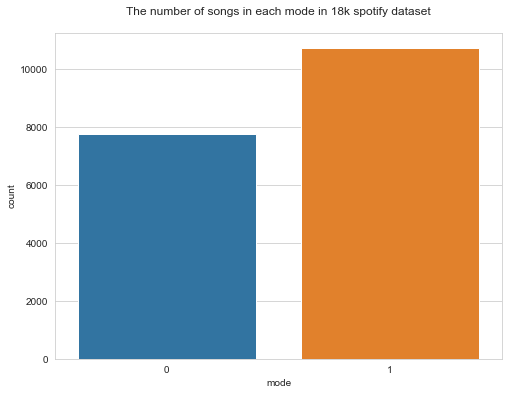

In [12]:
fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('The number of songs in each mode in 18k spotify dataset\n')
ax = sns.countplot(x='mode', data=df)

In [13]:
mode_count = df.groupby('mode')['track_id'].count()
mode_count_rank = mode_count.sort_values(ascending = False)
print(mode_count_rank)

mode
1    10713
0     7741
Name: track_id, dtype: int64


In these 18K songs, mode is 1 more than mode is 0. It shows that more of these songs use major melody.

#### Genre

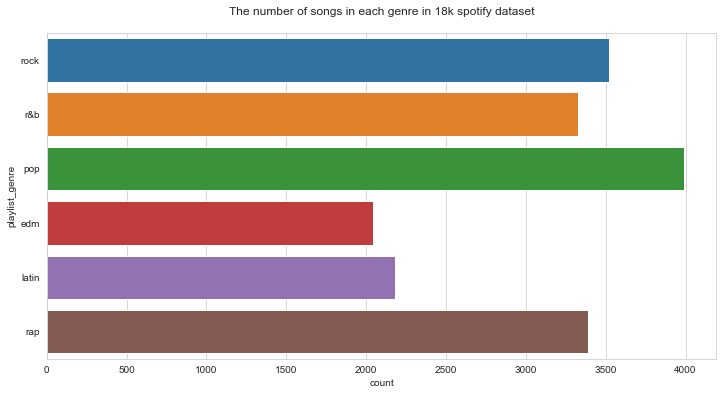

In [14]:
fig,ax = plt.subplots(figsize=(12,6))
ax.set_title('The number of songs in each genre in 18k spotify dataset\n')
ax = sns.countplot(y='playlist_genre', data=df)

In [15]:
genre_count = df.groupby('playlist_genre')['track_id'].count()
genre_count_rank = genre_count.sort_values(ascending = False)
print(genre_count_rank)

playlist_genre
pop      3993
rock     3521
rap      3391
r&b      3326
latin    2178
edm      2045
Name: track_id, dtype: int64


Among these 18K songs, pop songs are the most, followed by rock songs. The the number of gerne of songs is r&b and rap is about the same; The least is latin and edm.

#### Language

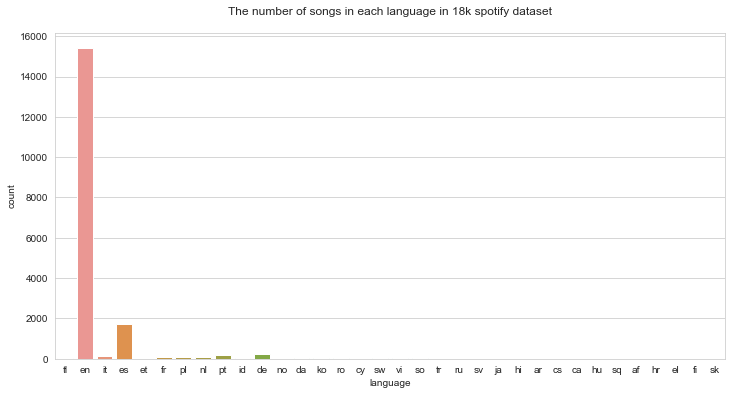

In [16]:
fig1,ax1 = plt.subplots(figsize=(12,6))
ax1.set_title('The number of songs in each language in 18k spotify dataset\n')
ax1 = sns.countplot(x='language', data=df)

In [17]:
language_count = df.groupby('language')['track_id'].count()
language_count_rank = language_count.sort_values(ascending = False)
print(language_count_rank)

language
en    15405
es     1705
de      241
pt      176
it      133
pl       76
nl       72
fr       65
tl       63
da       40
id       34
ko       29
vi       24
ro       16
sw       16
so       16
cy       12
hi       10
no       10
ja        8
et        7
tr        5
sv        5
af        5
ru        4
hr        3
sq        3
el        2
ar        2
ca        2
cs        2
sk        1
fi        1
hu        1
Name: track_id, dtype: int64


The songs in the dataset are mainly English songs.

Numeric Features Distribution



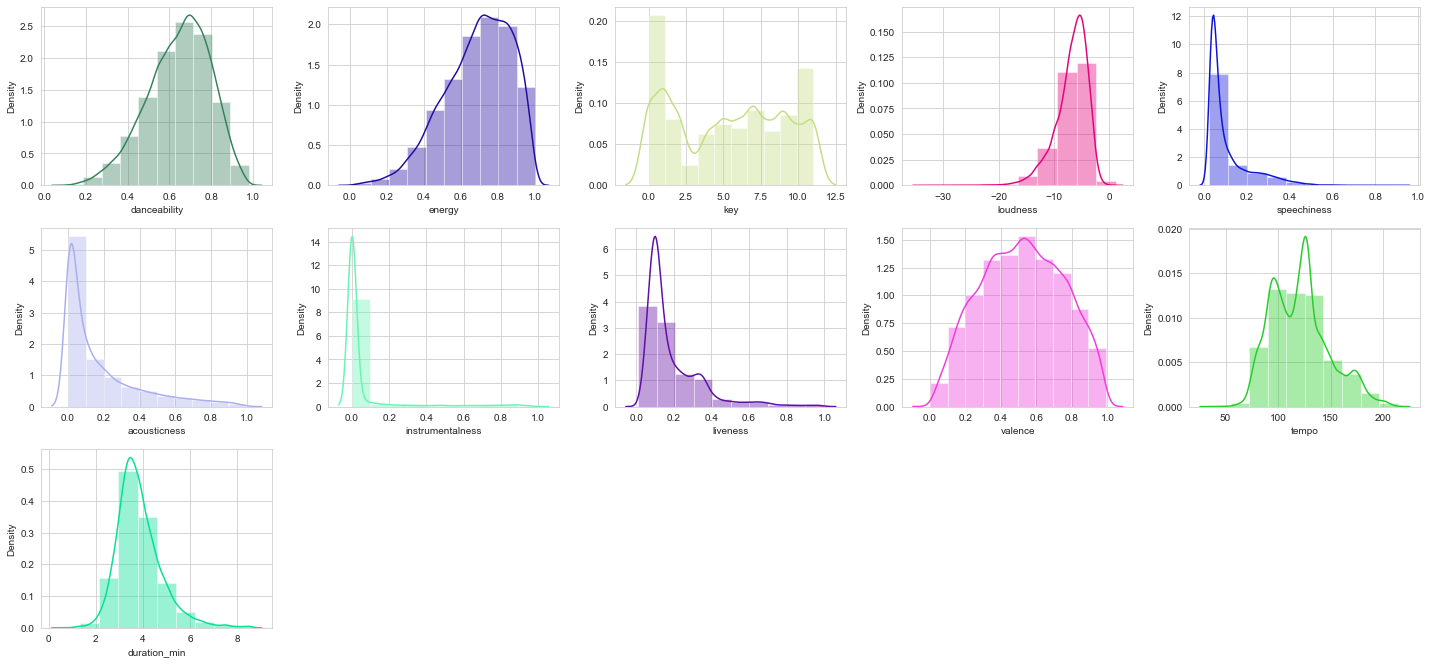

In [18]:
import math
import warnings 
warnings.filterwarnings('ignore')# distplot() will cause the warnings 

color=['r','g','b','g','b','r']
numeric_attr = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                    'duration_min',]

plt.figure(figsize=[20,4*math.ceil(len(numeric_attr)/5)])

# default row no.
j = 1
for i in range(len(numeric_attr)):
    # change the row no.
    if i == 5-1:
        j = 2
    elif i == 10-1:
        j = 3
    # plot
    plt.subplot(math.ceil(len(numeric_attr)/3),5,i+1)
    sns.distplot(df[numeric_attr[i]],
                 #hist_kws=dict(edgecolor="black", linewidth=2), 
                 bins=10, 
                 color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
print('Numeric Features Distribution\n')
plt.show()


- Music popularity(track_popularity): in this 18K music data set, the songs with popularity of about 0 or 50 are the most, and the songs with popularity near 100 are the least.
- Dance ability(Danceability): the degree of songs suitable for dancing is concentrated at about 0.6. The closer dance ability is to 0 and 1, the fewer songs are.
- Energy: most of the 18K songs have strong energy. When energy is 0.75, the number of songs reaches a peak. The lower the energy, the fewer songs.
- Key: there are at most 4000 + songs with a key of 0, at least 500 songs with a key of about 2.5, and more songs with a key of 10. The number of songs with other key values basically ranges from 1000 to 2000.
- Loudness: the value of loudness is concentrated between - 20 and 0.
- Mode: As can be seen from the above figure, the distribution of mode is discrete, while the values of other attributes are continuous. Therefore, the subsequent overall analysis shall be handled separately. Mode is 1 or more.
- Speechiness, acousticness and instrumentalness are mainly concentrated at 0. It shows that the basic of this 18K song is music and other non voice tracks, the track is non acoustic, and the human voice is more prominent than the performance of musical instruments.
- Liveness: the vitality is basically lower than 0.8 and concentrated near 0. It shows that most of these songs prefer to be recorded in the studio rather than the live version.
- Valence: valence is concentrated at 0.5, and the whole distribution is similar to the normal distribution. The emotional state of songs is neither extremely negative nor extremely positive.
- Tempo: the speed of these songs is mainly 100-150bmp
- Duration of songs(duration_min): The general song time is about 3 minutes and 20 seconds.

#### Define shared functions

In [19]:
def attr_select(df, songsNum, attribute):
    '''
    function to select specific attribute's distribution in top-n columns in matrix 'df'
    'songsNum' means the top-n columns in 'df'
    'attribute' means the specific attribute
    '''
    topN_attribute = df_rank.iloc[0:songsNum, :].groupby(attribute)['track_id'].count()
    return topN_attribute


#### 3.1.1 What is the relationship between popularity and numeric features?

**Popularity & danceability, energy, key, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo,duration_min**

These attributes are continuous values, so join plot is used for visual analysis.
(the value of mode is discrete and will be analyzed separately)

Popularity & Numeric features on


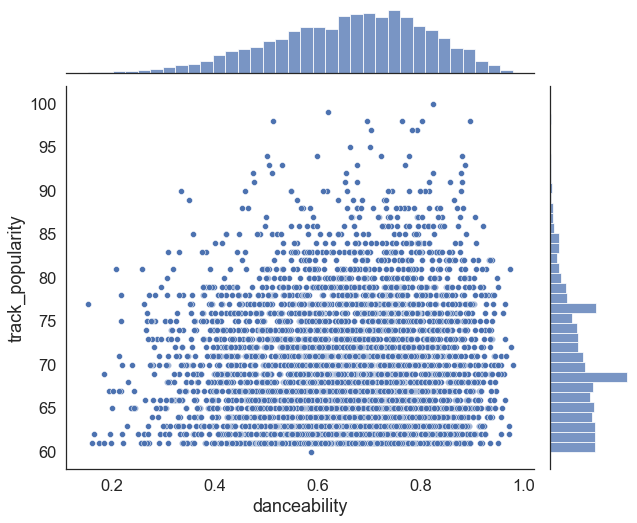

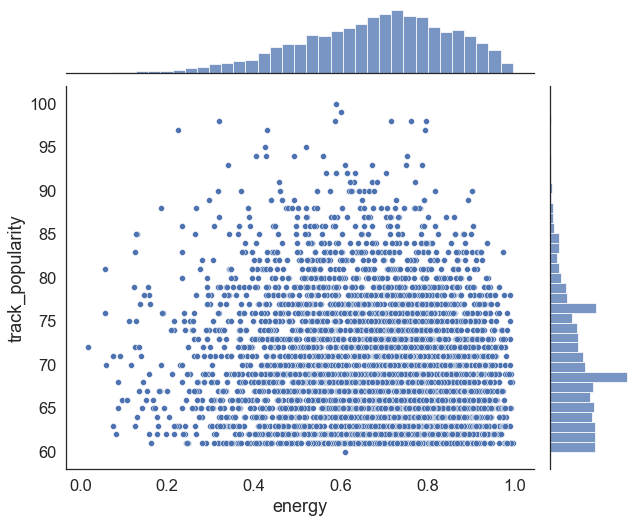

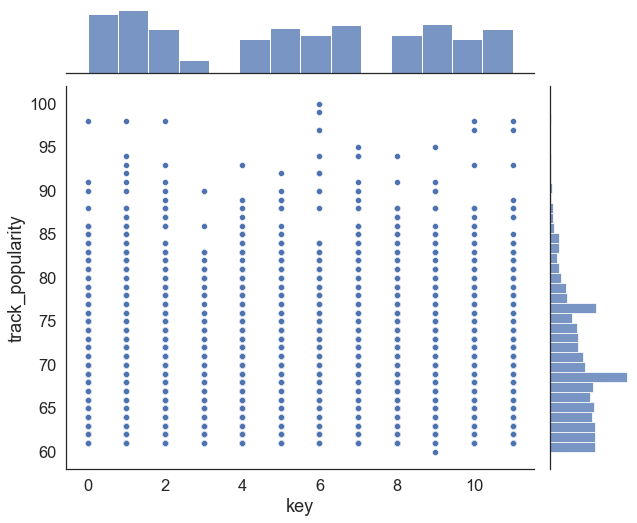

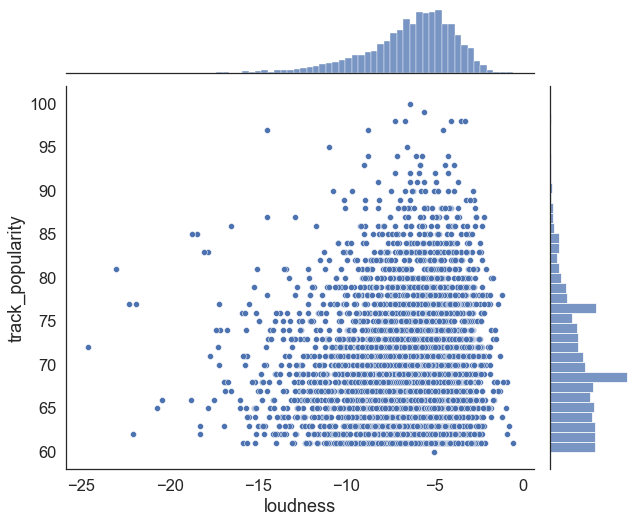

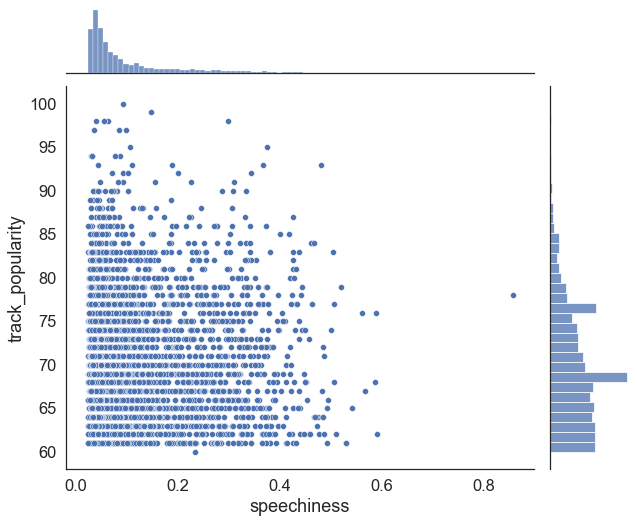

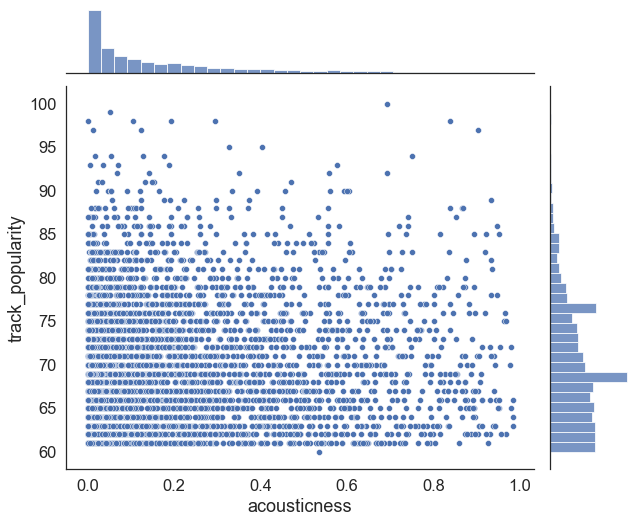

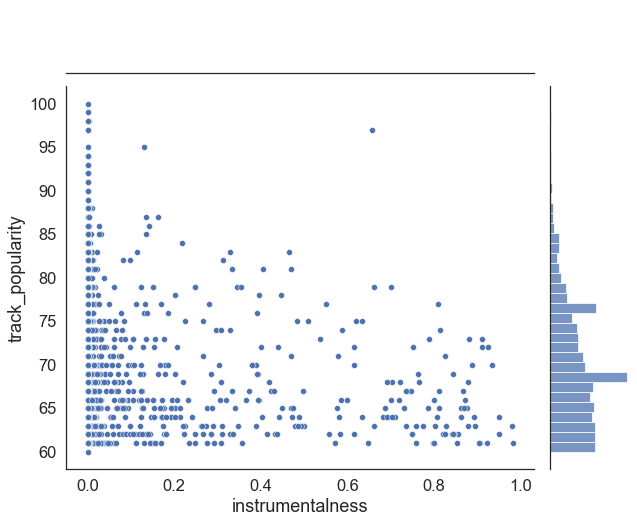

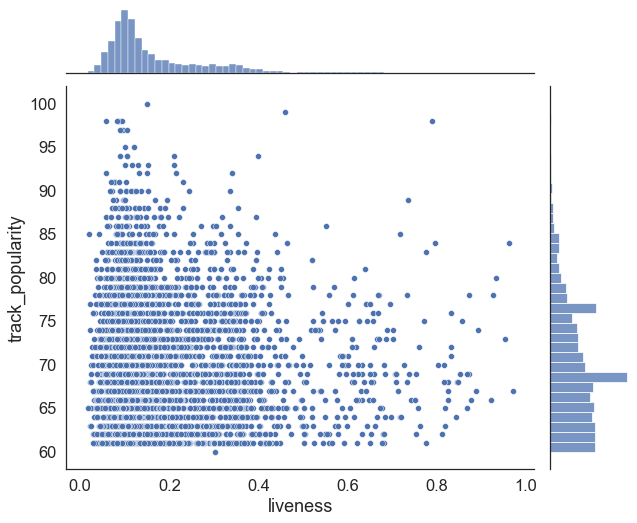

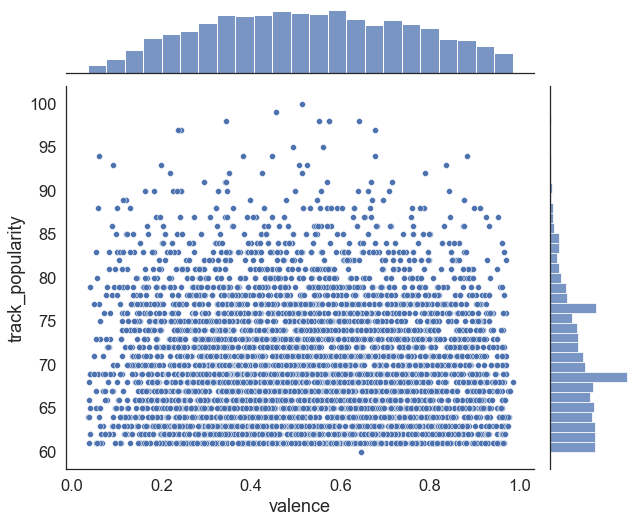

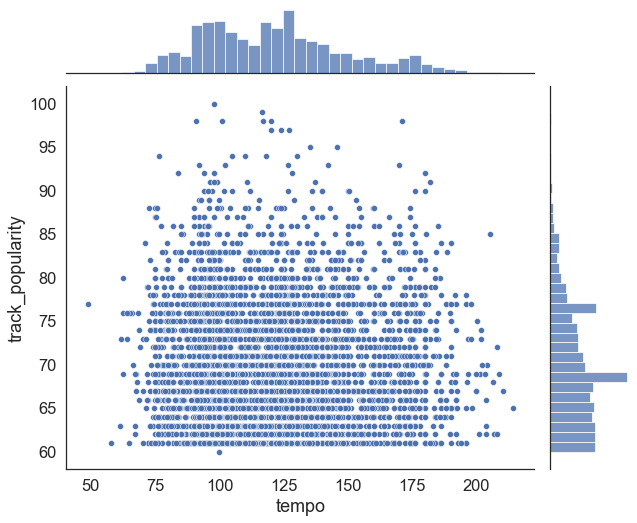

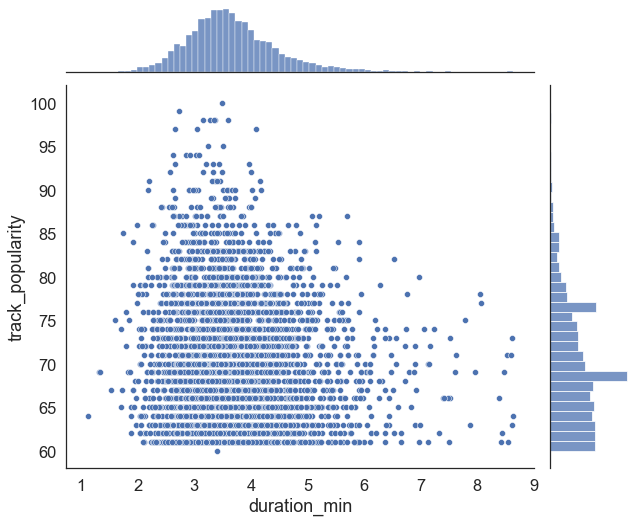

In [20]:
sns.set(style="white",font_scale=1.5)
# reduce the data scale to make sure the visualization more clear
df_1000 = df_rank.iloc[0:5000, :]

attr_continues = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                    'duration_min',]

print('Popularity & Numeric features on')

for attr in attr_continues:
    g = sns.jointplot(x=attr, y='track_popularity', data=df_1000)
    g.fig.set_size_inches(10,8) 

The jointplot above shows that, except for tempo, each variable has a regression line with a small slope, and there is at least a weak correlation between these variables and song popularity. Within a certain interval, the larger the danceability, the smaller the energy, the smaller the key, the larger the loudness, the larger the speechiness, the larger the acousticness, the smaller the instrumentalness, the smaller the liveness, the smaller the valence, and the smaller the duration_ms. popularity will be relatively high.


#### 3.1.2 What is the relationship between popularity and Categorical features? 

#### mode & popularity
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.(from https://www.kaggle.com/datasets/imuhammad/audio-features-and-lyrics-of-spotify-songs)

In [21]:
def mode_print(df, songsNum):
    '''
    print mode_analyze(df, songsNum) and attach the text explaination 
    recall the funtion 'attr_select(df, songsNum, attribute)'
    '''
    return print("In top-"+str(songsNum)+" popular songs'", attr_select(df, songsNum, 'mode'))

In [22]:
mode_print(df_rank, 500)
mode_print(df_rank, 1000)
mode_print(df_rank, 2500)
mode_print(df_rank, 5000)

In top-500 popular songs' mode
0    218
1    282
Name: track_id, dtype: int64
In top-1000 popular songs' mode
0    414
1    586
Name: track_id, dtype: int64
In top-2500 popular songs' mode
0    1000
1    1500
Name: track_id, dtype: int64
In top-5000 popular songs' mode
0    2030
1    2970
Name: track_id, dtype: int64


Here, the stacking effect will be used to display the mode distribution in top-n, so the existing function will not be called.

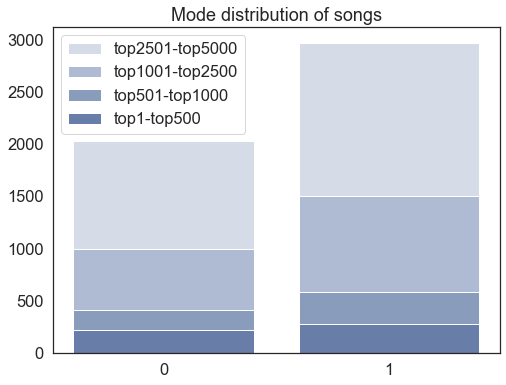

In [23]:
##### show them in bar charts
mode_5000 = attr_select(df_rank, 5000, 'mode')
mode_2500 = attr_select(df_rank, 2500, 'mode')
mode_1000 = attr_select(df_rank, 1000, 'mode')
mode_500 = attr_select(df_rank, 500, 'mode')

x_bar = mode_5000.index

plt.figure(figsize=(8, 6))
plt.bar(x=x_bar, height=mode_5000, label='top2501-top5000', color='#D5DCE7')
plt.bar(x=x_bar, height=mode_2500, label='top1001-top2500',color='#AEBBD2')
plt.bar(x=x_bar, height=mode_1000, label='top501-top1000', color='#8A9CBC')
plt.bar(x=x_bar, height=mode_500, label='top1-top500', color='#687DA7')

plt.title('Mode distribution of songs')
plt.xticks([0,1])
plt.legend()

plt.show()

In [24]:
mode_5000

mode
0    2030
1    2970
Name: track_id, dtype: int64

We checked the top 500, top 1000, top 2500 and top 5000 songs, and found that more songs use the major song mode than the minor song mode. It shows that it is likely that songs with mode melody in major are more likely to be liked by the audience.

However, due to the small slope of the regression line, it is necessary to check the correlation coefficient to more clearly see the correlation between popularity and each variable.

<a id='3.2'></a>
### 3.2 Q2 Is there a correlation between the values of different attributes of songs?

#### 3.2.1 Correlation matrix of numeric features

In [25]:
df.corr()

track_popularity  danceability    energy       key  \
track_popularity          1.000000      0.061499 -0.093521 -0.006878   
danceability              0.061499      1.000000 -0.089708  0.002090   
energy                   -0.093521     -0.089708  1.000000  0.018833   
key                      -0.006878      0.002090  0.018833  1.000000   
loudness                  0.031290      0.022830  0.674795  0.007280   
mode                      0.010947     -0.078020 -0.009903 -0.169589   
speechiness              -0.000622      0.204041 -0.011986  0.026282   
acousticness              0.076821     -0.029240 -0.546033 -0.002067   
instrumentalness         -0.080933     -0.049187  0.042093  0.004243   
liveness                 -0.059334     -0.114719  0.156931  0.000682   
valence                  -0.004490      0.343419  0.207941  0.021927   
tempo                     0.011954     -0.201465  0.138291 -0.018967   
duration_min             -0.143970     -0.133803 -0.021134  0.016984   

                  loudness      mode  speechiness  acousticness  \
track_popularity  0.031290  0.010947    -0.000622      0.076821   
danceability      0.022830 -0.078020     0.204041     -0.029240   
energy            0.674795 -0.009903    -0.011986     -0.546033   
key               0.007280 -0.169589     0.026282     -0.002067   
loudness          1.000000 -0.035276     0.029858     -0.370628   
mode             -0.035276  1.000000    -0.070013      0.022191   
speechiness       0.029858 -0.070013     1.000000     -0.000217   
acousticness     -0.370628  0.022191    -0.000217      1.000000   
instrumentalness -0.099164 -0.002906    -0.108365     -0.015803   
liveness          0.071159  0.004850     0.060072     -0.067491   
valence           0.050211 -0.009382     0.035202     -0.069817   
tempo             0.082558  0.026421     0.033620     -0.096149   
duration_min     -0.159026  0.012433    -0.094343     -0.052996   

                  instrumentalness  liveness   valence     tempo  duration_min  
track_popularity         -0.080933 -0.059334 -0.004490  0.011954     -0.143970  
danceability             -0.049187 -0.114719  0.343419 -0.201465     -0.133803  
energy                    0.042093  0.156931  0.207941  0.138291     -0.021134  
key                       0.004243  0.000682  0.021927 -0.018967      0.016984  
loudness                 -0.099164  0.071159  0.050211  0.082558     -0.159026  
mode                     -0.002906  0.004850 -0.009382  0.026421      0.012433  
speechiness              -0.108365  0.060072  0.035202  0.033620     -0.094343  
acousticness             -0.015803 -0.067491 -0.069817 -0.096149     -0.052996  
instrumentalness          1.000000 -0.000021 -0.103020  0.028126      0.078505  
liveness                 -0.000021  1.000000 -0.006931  0.015658      0.026988  
valence                  -0.103020 -0.006931  1.000000 -0.017101     -0.045546  
tempo                     0.028126  0.015658 -0.017101  1.000000     -0.014873  
duration_min              0.078505  0.026988 -0.045546 -0.014873      1.000000

#### 3.2.2 Show correlation coefficients using a heat map

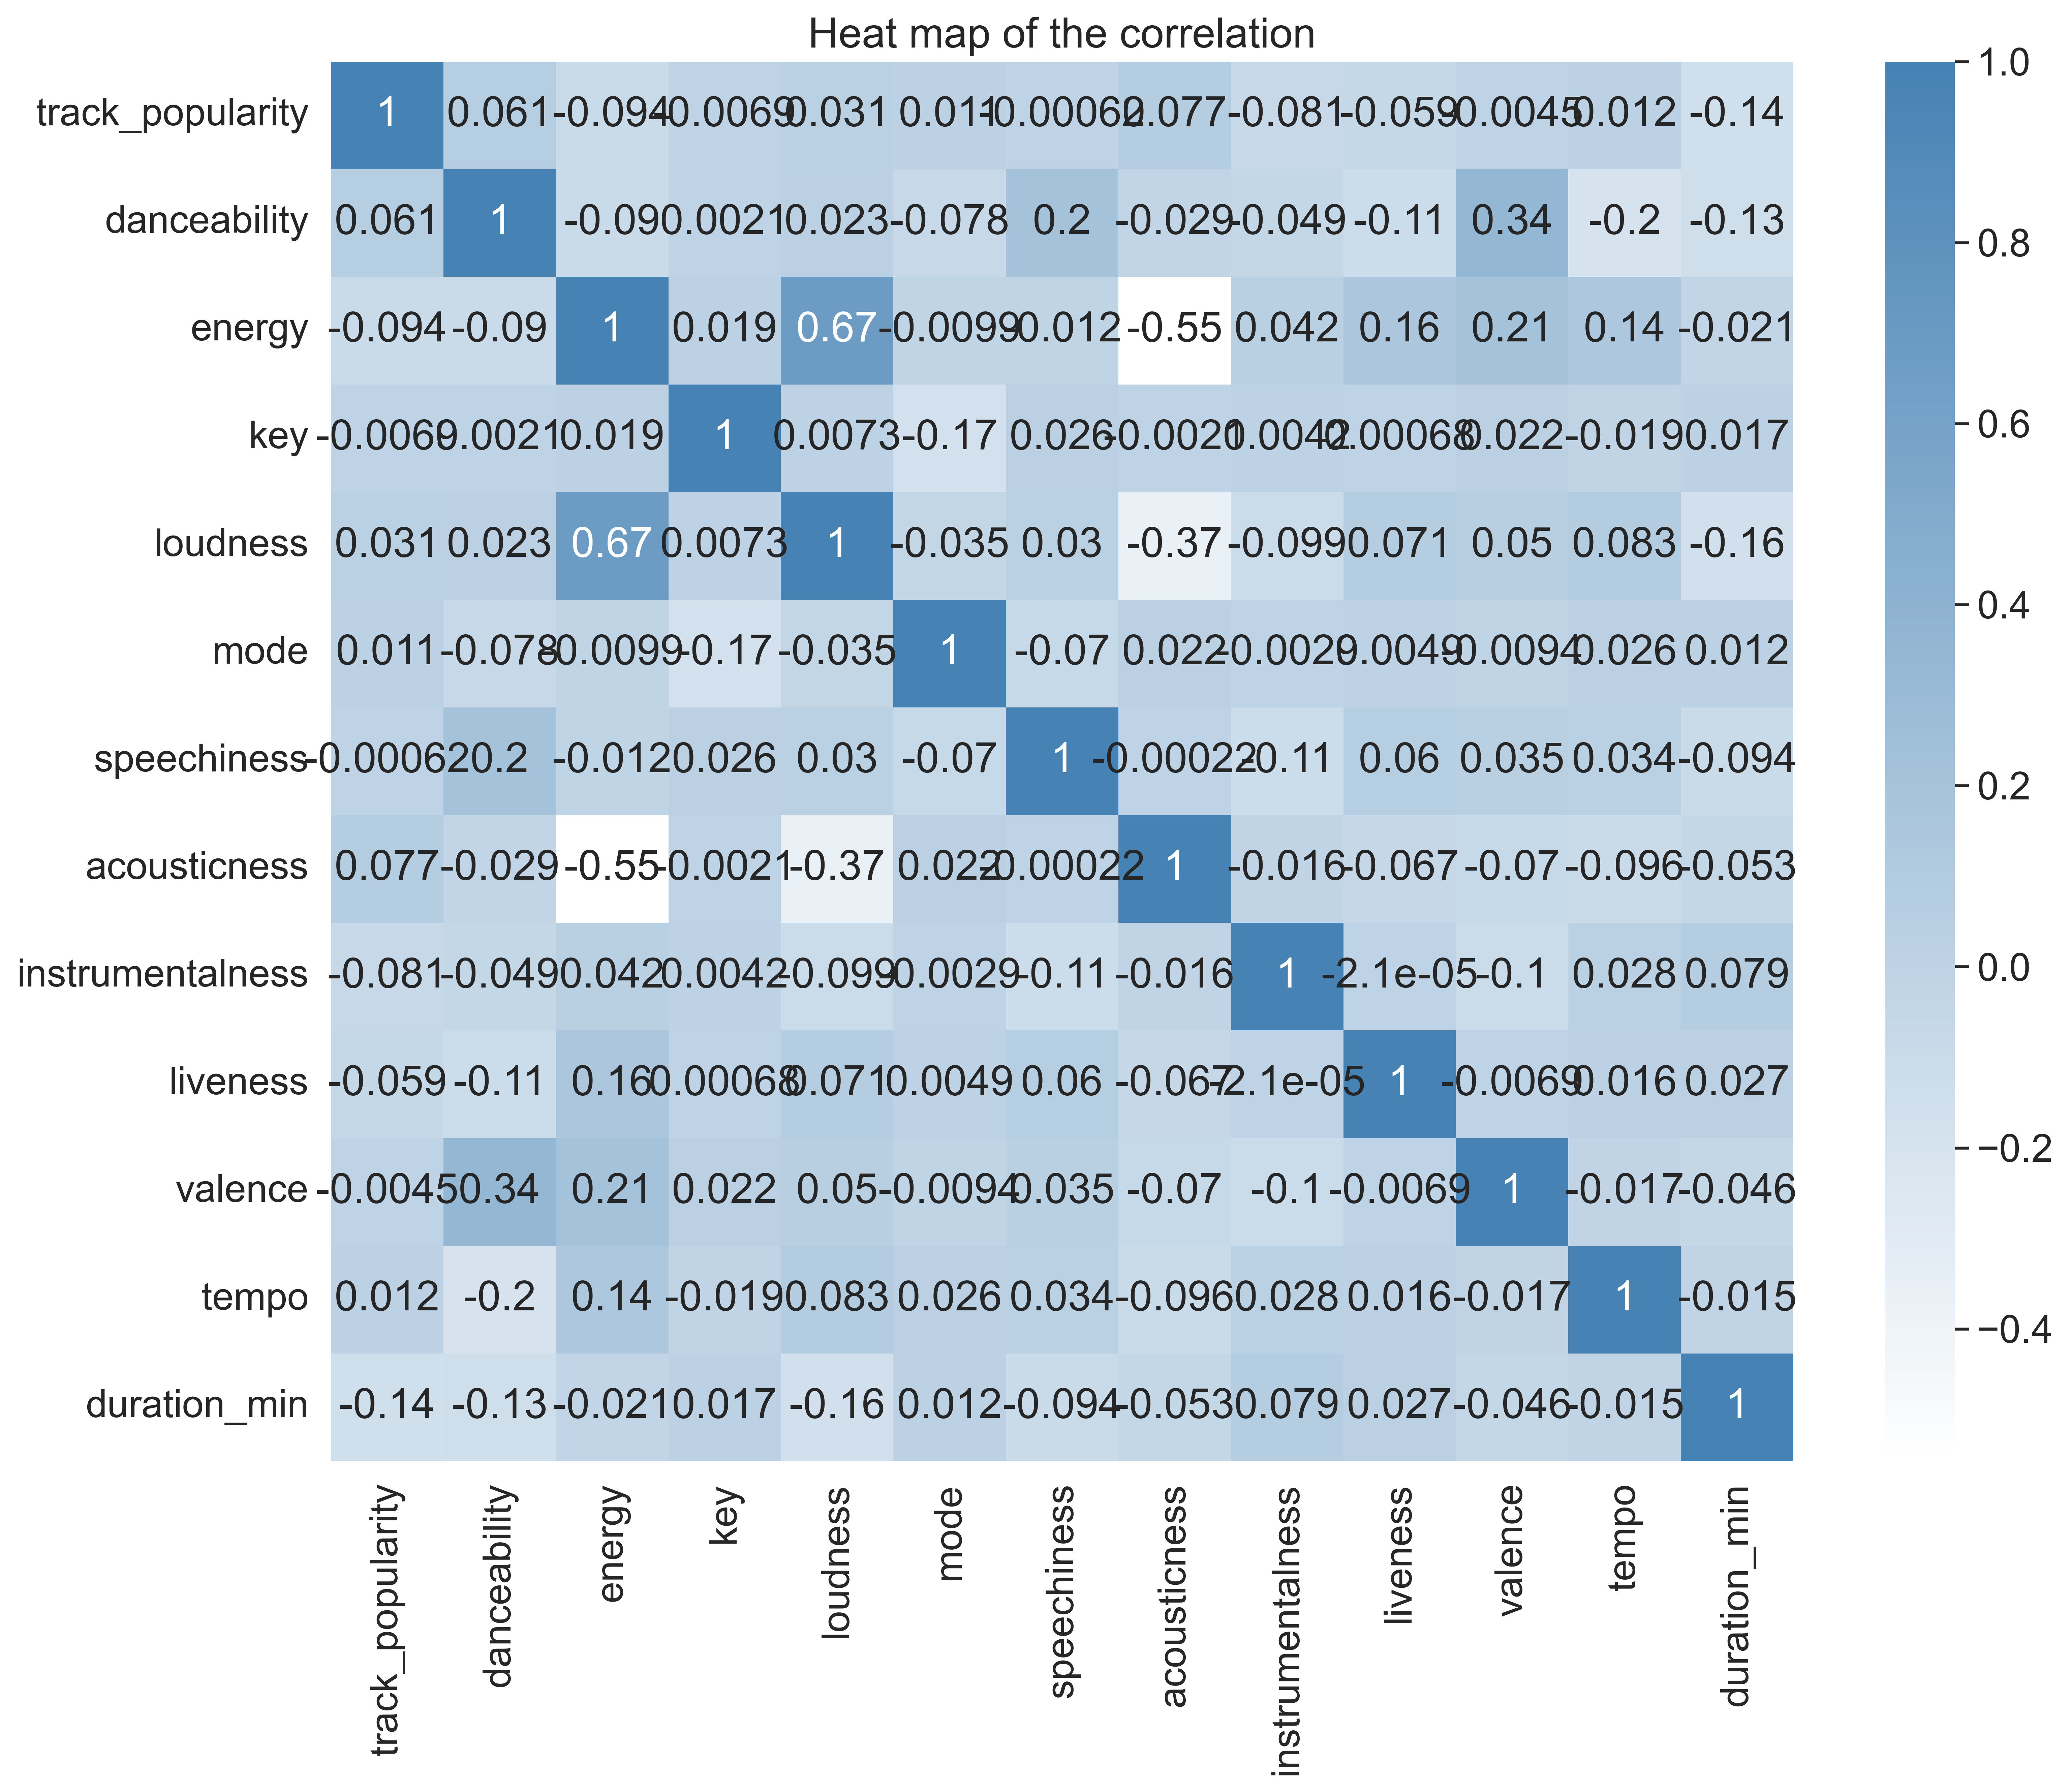

In [26]:
from matplotlib.colors import LinearSegmentedColormap

my_colormap = LinearSegmentedColormap.from_list("", ["white", "steelblue"])
plt.figure(dpi=500,figsize=(14,11))
sns.heatmap(df.corr(), annot=True, cmap=my_colormap)
plt.title('Heat map of the correlation')
plt.show()

#### 3.2.3 Display the distribution of numerical features with scatter matrix

The distribution of numerical features with scatter matrix


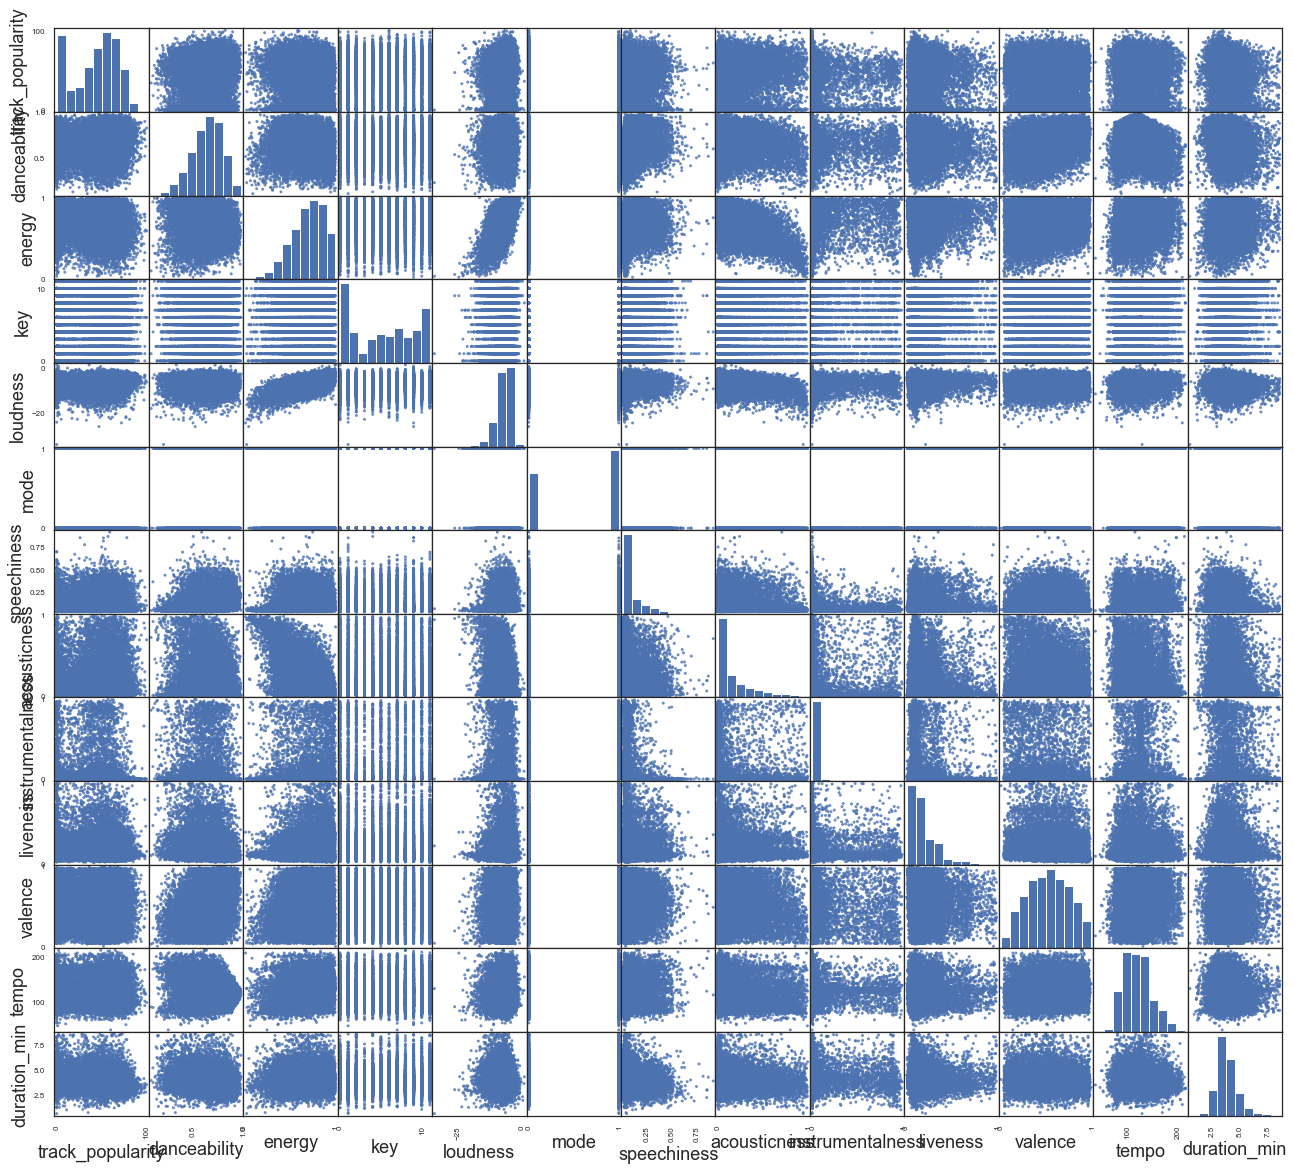

In [27]:
print('The distribution of numerical features with scatter matrix')
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(22,20))
plt.show()

It can be seen from the above scatter diagram and correlation heat map that among these variables, the correlation between energy and loudness is the highest at 0.67, which is a positive medium correlation; followed by energy and acousticness, the correlation is -0.55, which is a negative medium correlation. The third is the loudness and acousticness of -0.37, which is a negative correlation; the fourth is the valence and danceability, which is 0.34 is a positive correlation.

<a id='3.3'></a>
### 3.3 Q3 What are the characteristics of the Top 500 (popularity) songs’ lyrics on Spotify?

#### 3.3.1 Use word clouds to represent high frequency words

In [28]:
# Top 500 English songs 
spotify_en = df[df['language'] == 'en']
spotify_rank = spotify_en.sort_values(by = 'track_popularity', ascending = False)
spotify_top500 = spotify_rank.iloc[0:500, :]
spotify_top500.head(5)

track_id       track_name    track_artist  \
6925   2XU0oxnq2qxCpomAAuJY8K     Dance Monkey     Tones and I   
14477  696DnlkuDOXcMAnKlTgXXK          ROXANNE  Arizona Zervas   
4813   21jGcNKet2qwijlDFuPiPb          Circles     Post Malone   
1754   0sf12qNH5qcw8qpgymFOqD  Blinding Lights      The Weeknd   
1375   0nbXyq5TXYPCO7pr3N8S4I          The Box     Roddy Ricch   

                                                  lyrics  track_popularity  \
6925   They say, "Oh my God, I see the way you shine ...               100   
14477  All for the 'Gram Bitches love the 'Gram Oh, w...                99   
4813   Oh, oh, oh Oh,  oh, oh Oh,  oh, oh, oh, oh We ...                98   
1754   Yeah I've been tryna call I've been on my own ...                98   
1375   Pullin' out the coupe at the lot Told 'em fuck...                98   

               track_album_id                             track_album_name  \
6925   0UywfDKYlyiu1b38DRrzYD  Dance Monkey (Stripped Back) / Dance Monkey   
14477  6HJDrXs0hpebaRFKA1sF90                                      ROXANNE   
4813   4g1ZRSobMefqF6nelkgibi                         Hollywood's Bleeding   
1754   2ZfHkwHuoAZrlz7RMj0PDz                              Blinding Lights   
1375   52u4anZbHd6UInnmHRFzba        Please Excuse Me For Being Antisocial   

      track_album_release_date  \
6925                2019-10-17   
14477               2019-10-10   
4813                2019-09-06   
1754                2019-11-29   
1375                2019-12-06   

                                           playlist_name  \
6925   post-teen alternative, indie, pop (large variety)   
14477                          Global Top 50 | 2020 Hits   
4813     Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop   
1754                                         Todo Éxitos   
1375                                           RapCaviar   

                  playlist_id  ... loudness mode  speechiness  acousticness  \
6925   1y42gwI5cuwjBslPyQNfqb  ...   -6.400    0       0.0924       0.69200   
14477  1KNl4AYfgZtOVm9KHkhPTF  ...   -5.616    0       0.1480       0.05220   
4813   46Cl6dmeiylK6TRGXr7hHe  ...   -3.497    1       0.0395       0.19200   
1754   2ji5tRQVfnhaX1w9FhmSzk  ...   -4.075    1       0.0629       0.00147   
1375   37i9dQZF1DX0XUsuxWHRQd  ...   -6.687    0       0.0559       0.10400   

       instrumentalness  liveness  valence    tempo  duration_min  language  
6925           0.000104    0.1490    0.513   98.027      3.490633        en  
14477          0.000000    0.4600    0.457  116.735      2.727267        en  
4813           0.002440    0.0863    0.553  120.042      3.588000        en  
1754           0.000209    0.0938    0.345  171.017      3.359550        en  
1375           0.000000    0.7900    0.642  116.971      3.277550        en  

[5 rows x 25 columns]

In [29]:
# Remove punctuation
def clear_characters(text):
    return re.sub('\W', ' ', text)
spotify_top500['lyrics'] = spotify_top500['lyrics'].apply(clear_characters)

# Convert to lowercase
spotify_top500['lyrics'] = spotify_top500['lyrics'].str.lower()
spotify_top500['lyrics']

6925     they say   oh my god  i see the way you shine ...
14477    all for the  gram bitches love the  gram oh  w...
4813     oh  oh  oh oh   oh  oh oh   oh  oh  oh  oh we ...
1754     yeah i ve been tryna call i ve been on my own ...
1375     pullin  out the coupe at the lot told  em fuck...
                               ...                        
16700    round one  fight yeah  yeah the pharmacy uh uh...
6975     i found myself dreaming in silver and gold lik...
10033    yeah  yeah let me catch ya vibe  let s just ta...
14383    ayy  look know what i m sayin   i m straight o...
12394    na there s a lady who s sure all that glitters...
Name: lyrics, Length: 500, dtype: object

In [30]:
# Remove stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = str(spotify_top500['lyrics'])
stop_words = stopwords.words('english')
stop_words.extend(['uh', 'oh', 'na', 'yeah', 'let', 'ta','dtype','object','ya','em','va'])

word_tokens = word_tokenize(text)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

# print(word_tokens)
print(filtered_sentence)

['6925', 'god', 'shine', '...', '14477', 'gram', 'bitches', 'love', 'gram', '...', '4813', '...', '1754', 've', 'tryna', 'call', 've', '...', '1375', 'pullin', 'coupe', 'lot', 'told', 'fuck', '...', '...', '16700', 'round', 'fight', 'pharmacy', '...', '6975', 'dreaming', 'silver', 'gold', 'lik', '...', '10033', 'catch', 'vibe', '...', '14383', 'ayy', 'sayin', 'straight', '...', '12394', 'lady', 'glitters', '...', 'Name', ':', 'lyrics', ',', 'Length', ':', '500', ',', ':']


In [31]:
# Remove number
new_sentence = []
for x in filtered_sentence:
    if not x.isnumeric():
        new_sentence.append(x)
print(new_sentence)

['god', 'shine', '...', 'gram', 'bitches', 'love', 'gram', '...', '...', 've', 'tryna', 'call', 've', '...', 'pullin', 'coupe', 'lot', 'told', 'fuck', '...', '...', 'round', 'fight', 'pharmacy', '...', 'dreaming', 'silver', 'gold', 'lik', '...', 'catch', 'vibe', '...', 'ayy', 'sayin', 'straight', '...', 'lady', 'glitters', '...', 'Name', ':', 'lyrics', ',', 'Length', ':', ',', ':']


In [32]:
# Convert series to dataframe
df3 = pd.DataFrame(new_sentence) 
df3.columns =['lyrics'] # column name
df3.head()
#df3.tail()

lyrics
0      god
1    shine
2      ...
3     gram
4  bitches

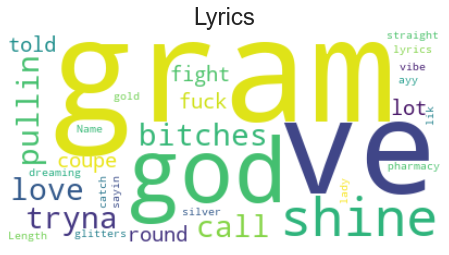

In [33]:
# create wordcloud
from wordcloud import WordCloud, ImageColorGenerator
lyrics_An = ' '.join(text for text in df3['lyrics'])
wordcloud = WordCloud(background_color = 'White').generate(lyrics_An)
plt.figure(figsize=(8,4))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Lyrics', size=24)
plt.show()

After data cleaning, including removing punctuation, stop words, number and converting to the lowercase, the processed lyrics of the top 500 English songs in terms of popularity were used as the object of study. As the wordcloud created, we can know that 'gram', 'god', 'shine', 'love' are the most common words in the lyrics of popular English songs.

#### 3.3.2 Apply LDA to lyrics and split them into topics

In [34]:
# File path of the output
top_words_csv_path = "../output/top_words.csv"
predict_topic_csv_path = '../output/topic_modelling_lda.csv'

# Number of topics
n_topics = 5
# Number of top words
n_top_words = 20

def top_words_data_frame(model: LatentDirichletAllocation,
                         tf_idf_vectorizer: TfidfVectorizer,
                         n_top_words: int) -> pd.DataFrame:
    
    rows = []
    feature_names = tf_idf_vectorizer.get_feature_names()
    for topic in model.components_:
        top_words = [feature_names[i]
                     for i in topic.argsort()[:-n_top_words - 1:-1]]
        rows.append(top_words)
    columns = [f'topic {i+1}' for i in range(n_top_words)]
    df = pd.DataFrame(rows, columns=columns)

    return df


def predict_to_data_frame(model: LatentDirichletAllocation, X: np.ndarray) -> pd.DataFrame:
   
    matrix = model.transform(X)
    columns = [f'P(topic word {i+1})' for i in range(len(model.components_))]
    df = pd.DataFrame(matrix, columns=columns)
    return df

# Creating tf-idf
tf_idf_vectorizer = TfidfVectorizer()
tf_idf = tf_idf_vectorizer.fit_transform(new_sentence)

lda = LatentDirichletAllocation(
    n_components=n_topics,
    max_iter=50,
    learning_method='online',
    learning_offset=50,
    random_state=0)

# Training lda models with the tf_idf corpus
lda.fit(tf_idf)

# Calculating n_top_words
top_words_df = top_words_data_frame(lda, tf_idf_vectorizer, n_top_words)

# Saving n_top_words to csv 
top_words_df.to_csv(top_words_csv_path, encoding='utf-8-sig', index=None)

# Turning tf_idf to array
X = tf_idf.toarray()

# Calculation of the probability distribution of the finished theme
predict_df = predict_to_data_frame(lda, X)

# Saving the text topic probability distribution to a csv file
predict_df.to_csv(predict_topic_csv_path, encoding='utf-8-sig', index=None)

#### 3.3.3 Use pdLDAvis to visualize the results;

In [35]:
# Using pyLDAvis to visualize
html_path = '../output/document-lda-visualization.html'
data = pyLDAvis.sklearn.prepare(lda, tf_idf, tf_idf_vectorizer)
pyLDAvis.save_html(data, html_path)

# Clearing the screen
os.system('clear')

# Using browser to see visualization results(html format)
os.system(f'start {html_path}')

print('Generated file：',
      top_words_csv_path,
      predict_topic_csv_path,
      html_path)

Generated file： ../output/top_words.csv ../output/topic_modelling_lda.csv ../output/document-lda-visualization.html


In order to have a better understanding and interpreting individual topic, and better understanding the relationships between topics, we used a popular visualization package -- pyLDAvis. In terms of the former, you can  view its top most frequent and/or “relevant” terms by manually selecting each topic, using different values of the λ parameter. In addition, you can have a better understanding about how topics relate to each other when you focus on the graph on the left hand side. As you can see from the generated file, Topic 4 and Topic 5 are pretty similar to each other because of many overlaps.

<a id='3.4'></a>
### 3.4 Q4 Do different music genres have different vocal characteristics?

#### 3.4.1 How many songs in each genre

In [36]:
df['playlist_genre'].value_counts()

pop      3993
rock     3521
rap      3391
r&b      3326
latin    2178
edm      2045
Name: playlist_genre, dtype: int64

Text(0.5, 1.0, 'Genre vs Count of the tracks')

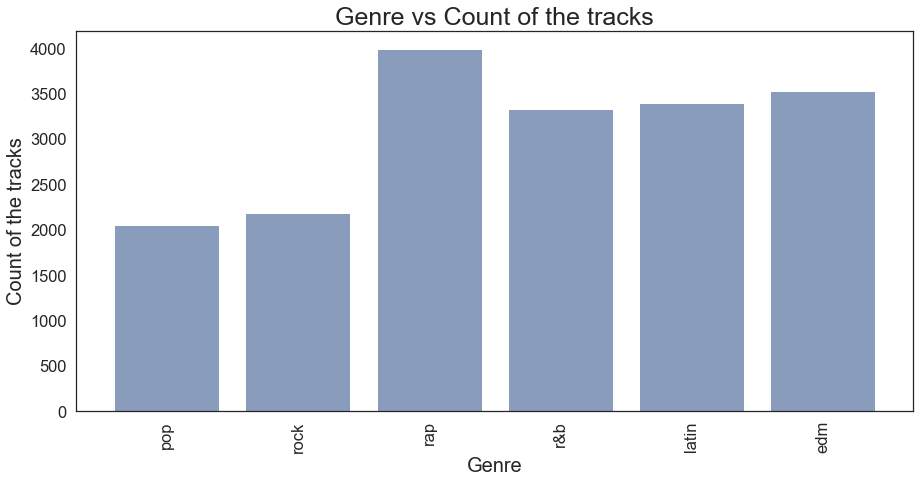

In [37]:
xtick = ['pop', 'rock', 'rap', 'r&b','latin', 'edm']
length = np.arange(len(xtick))
genre_groupby = df.groupby('playlist_genre')['track_name'].agg(len)
plt.figure(figsize = (15,7))
plt.bar(length, genre_groupby, color='#8A9CBC')
plt.xticks(length,xtick)
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel('Count of the tracks', fontsize = 20)
plt.title('Genre vs Count of the tracks', fontsize = 25)

#### 3.4.2 What is the relationship between genres and numeric features?

In [38]:
parameter = spotify_en.select_dtypes(include=['int64', 'float']).columns
parameter

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_min'],
      dtype='object')

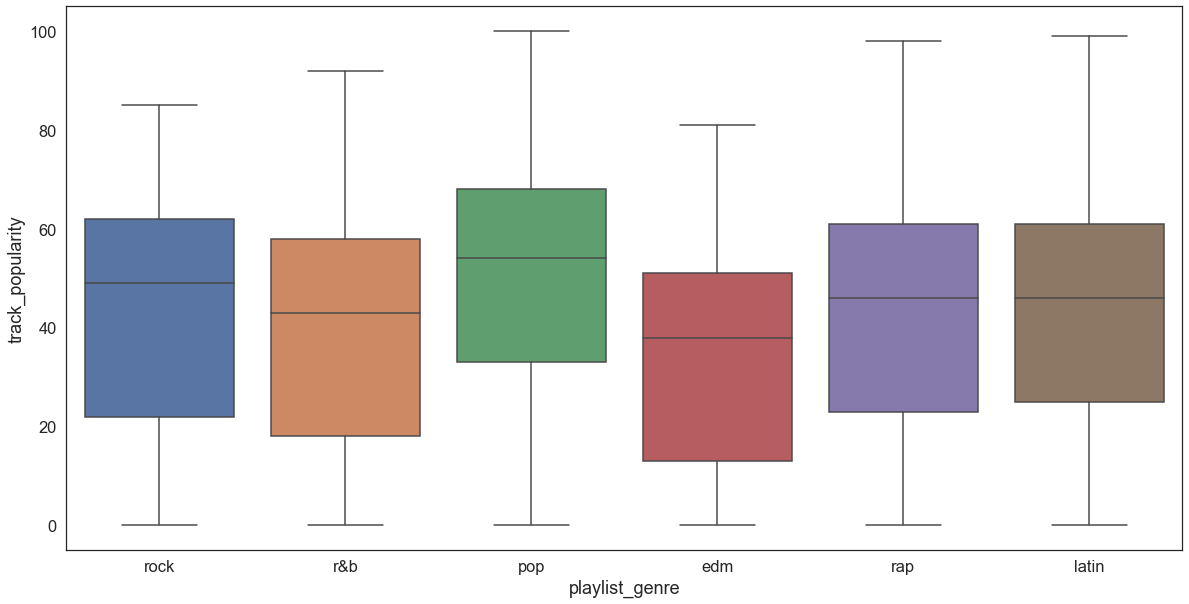

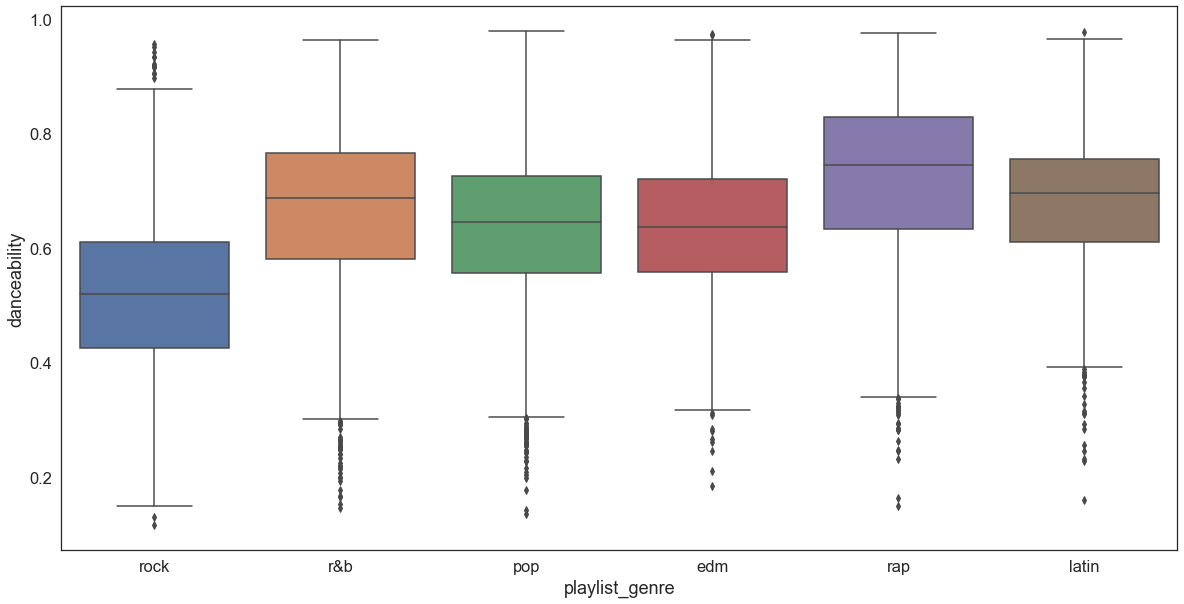

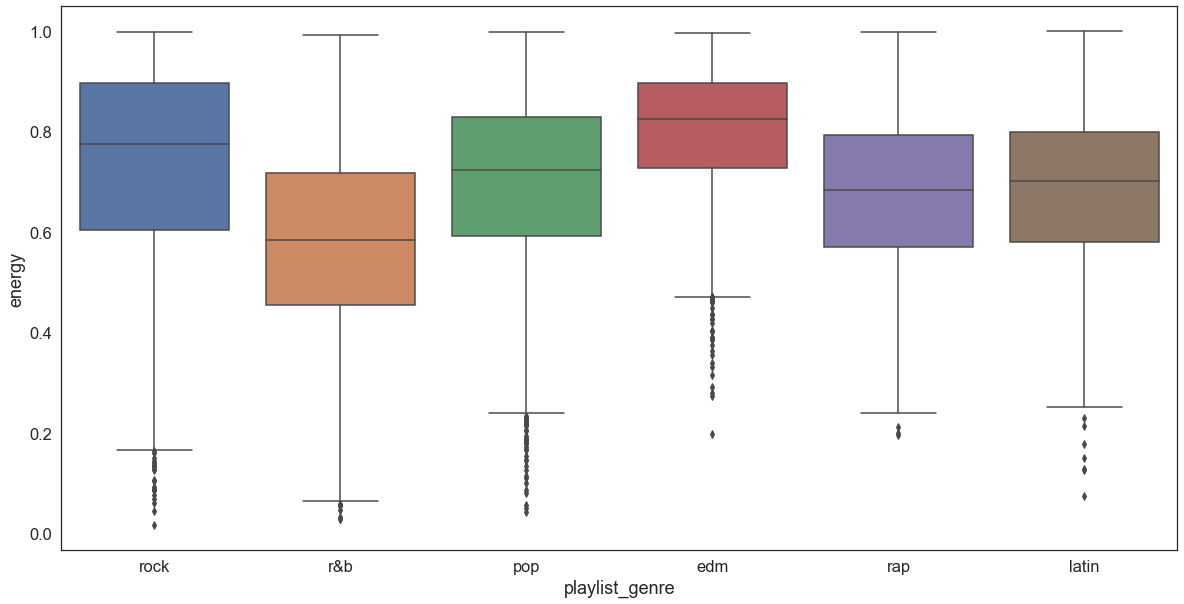

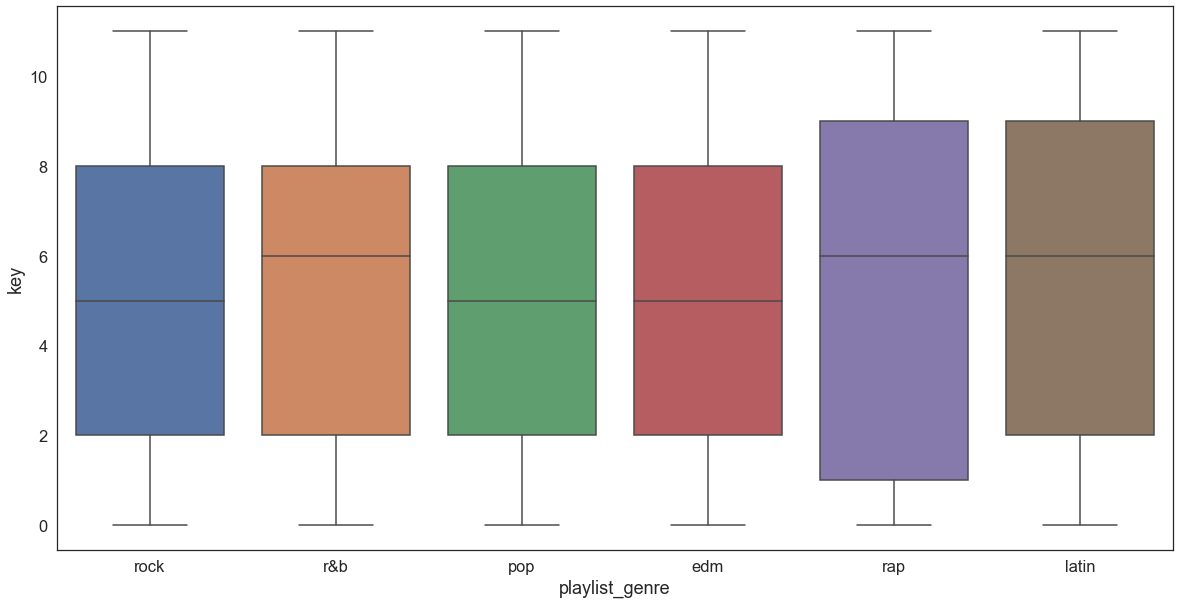

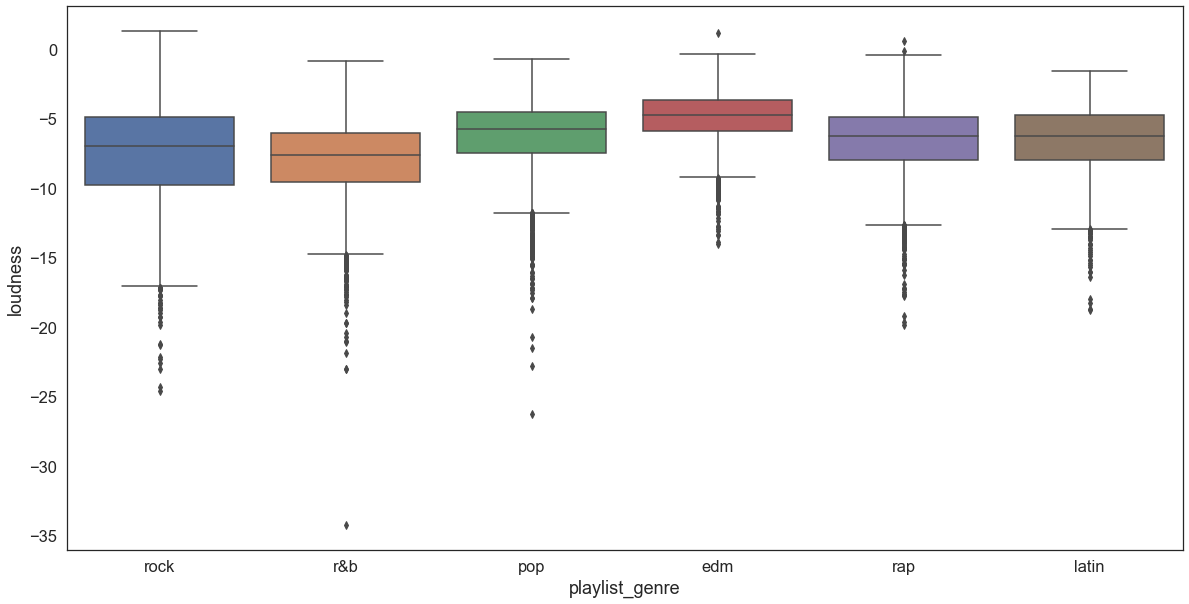

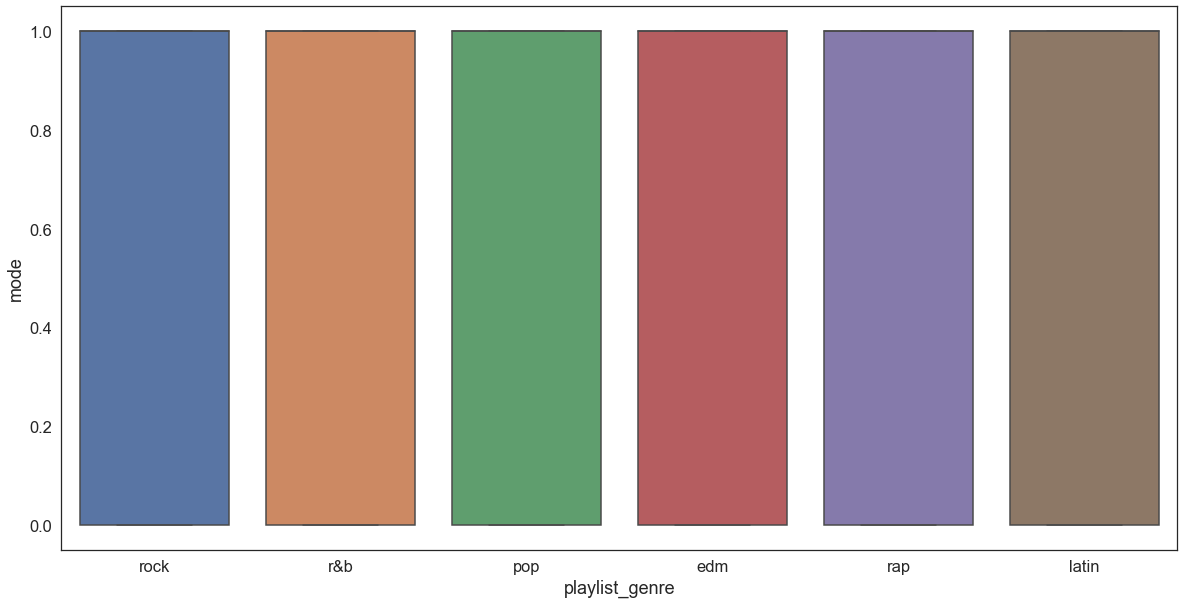

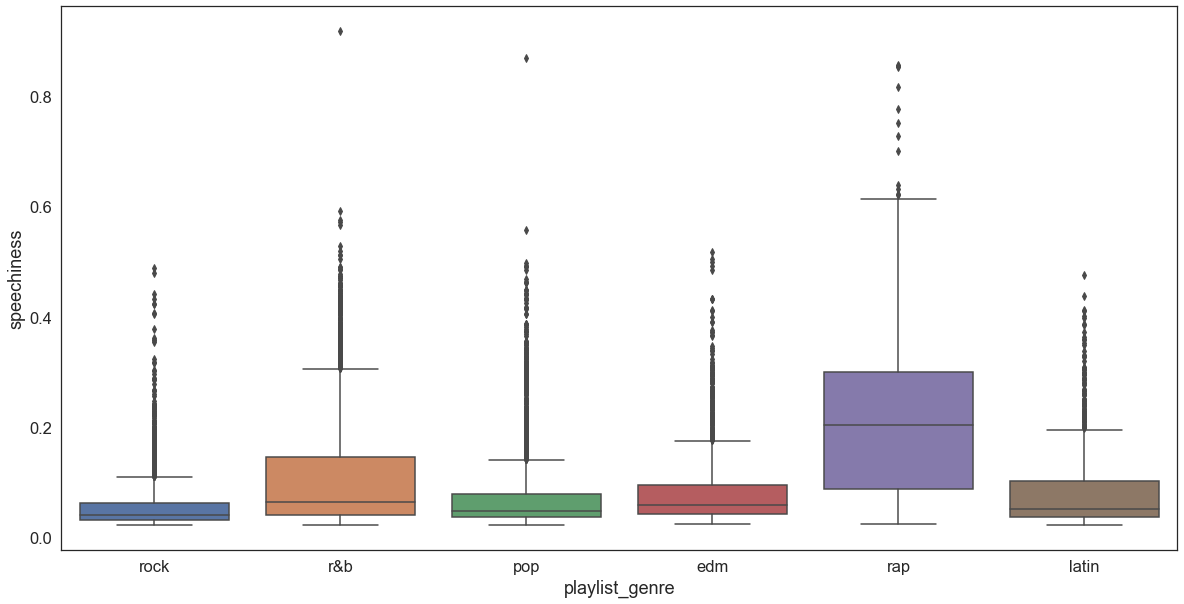

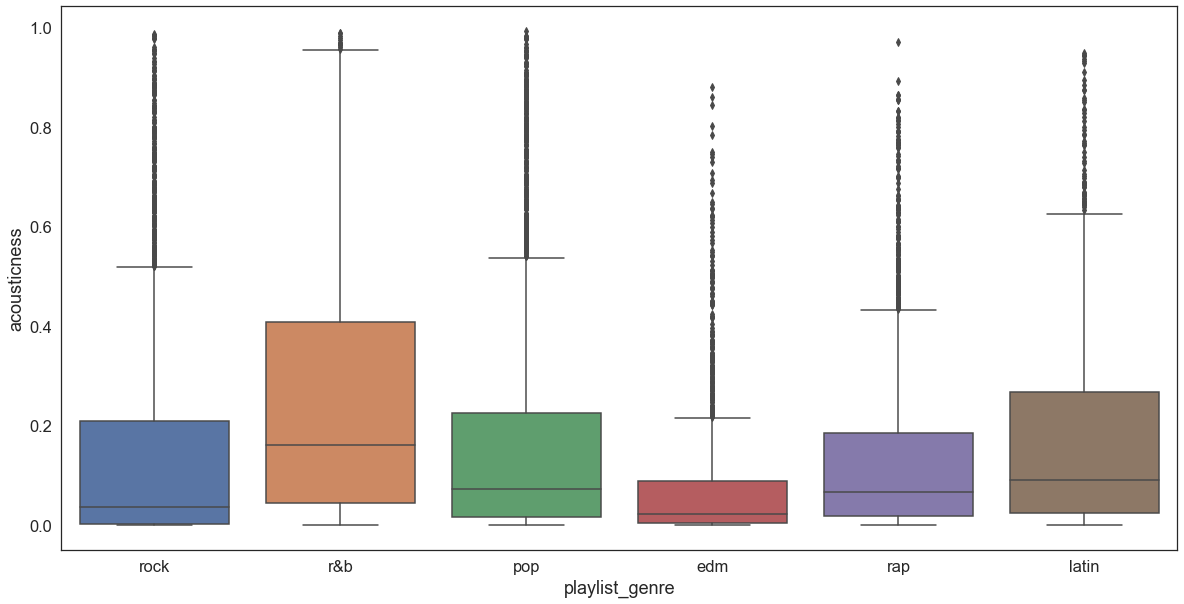

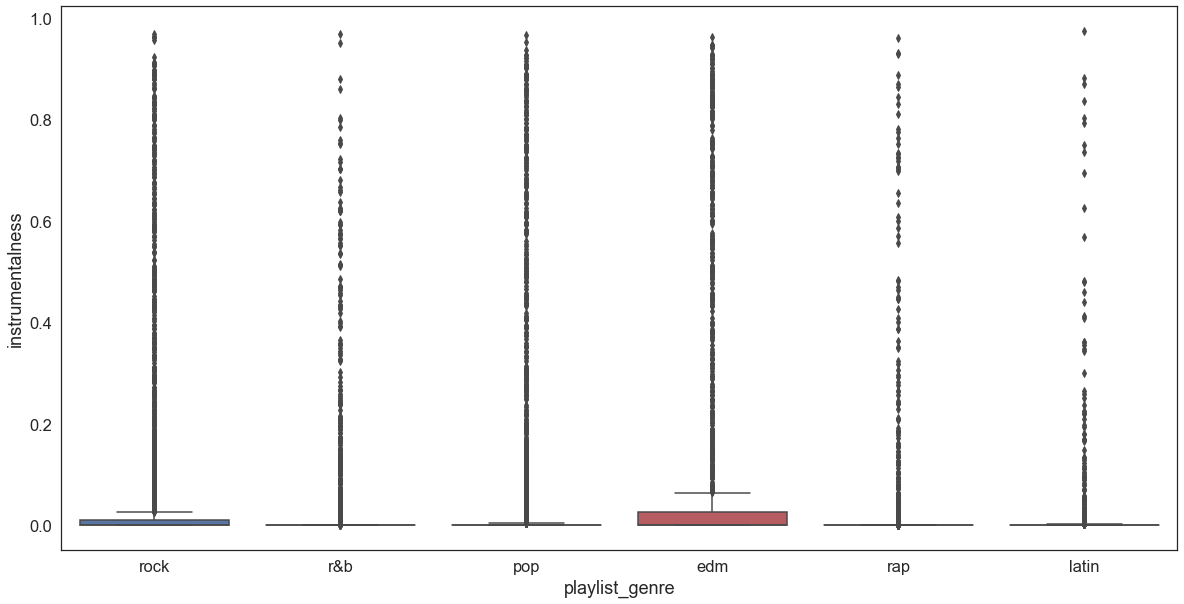

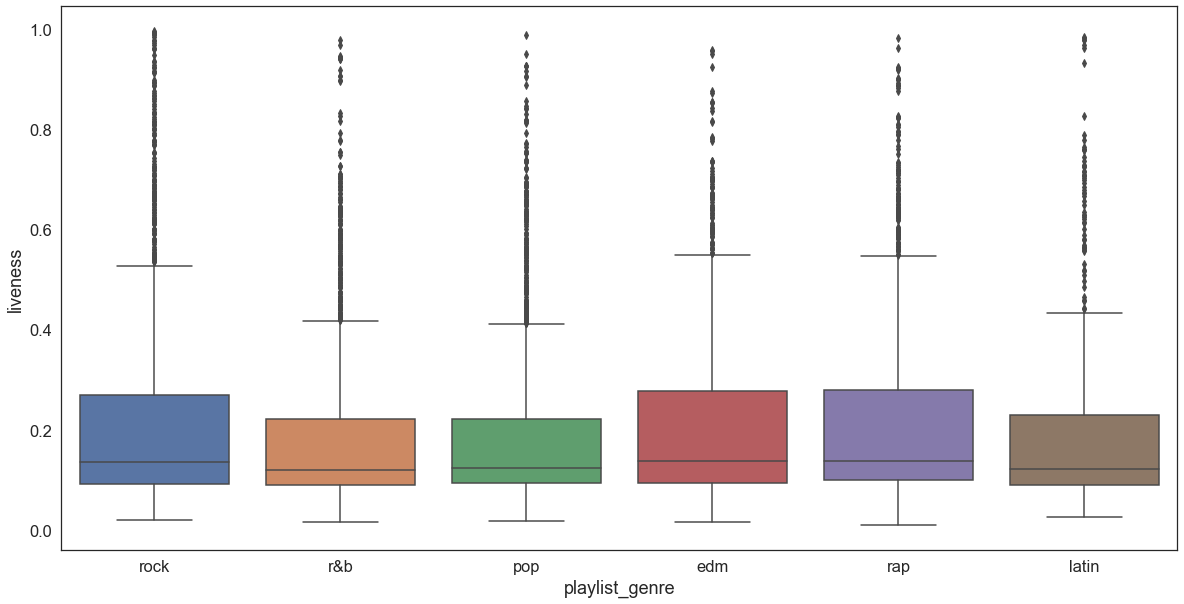

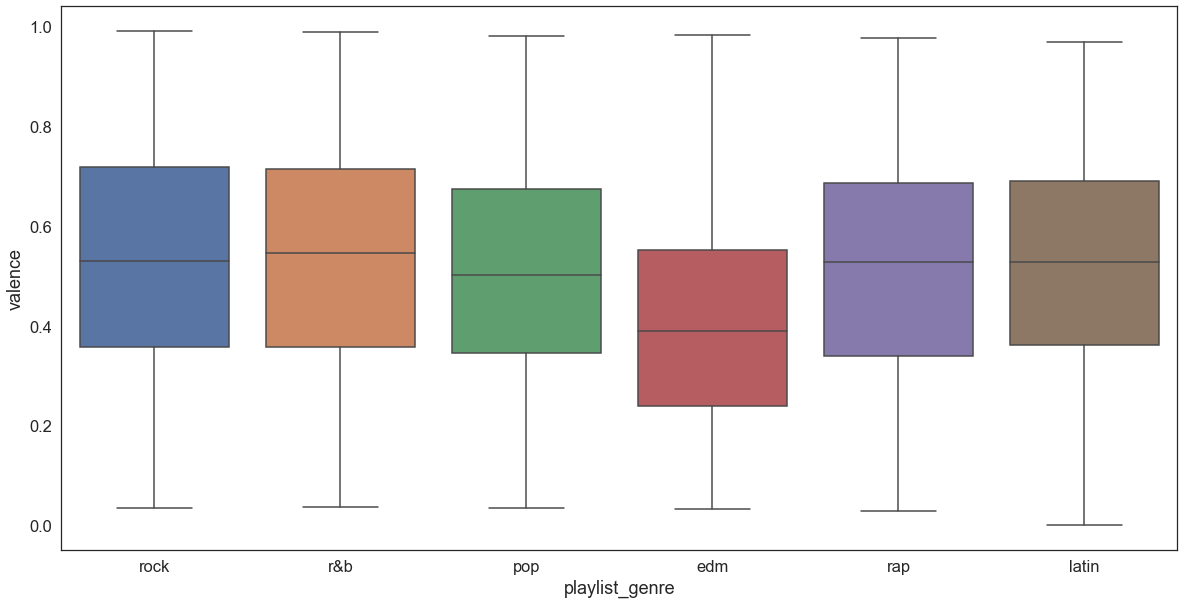

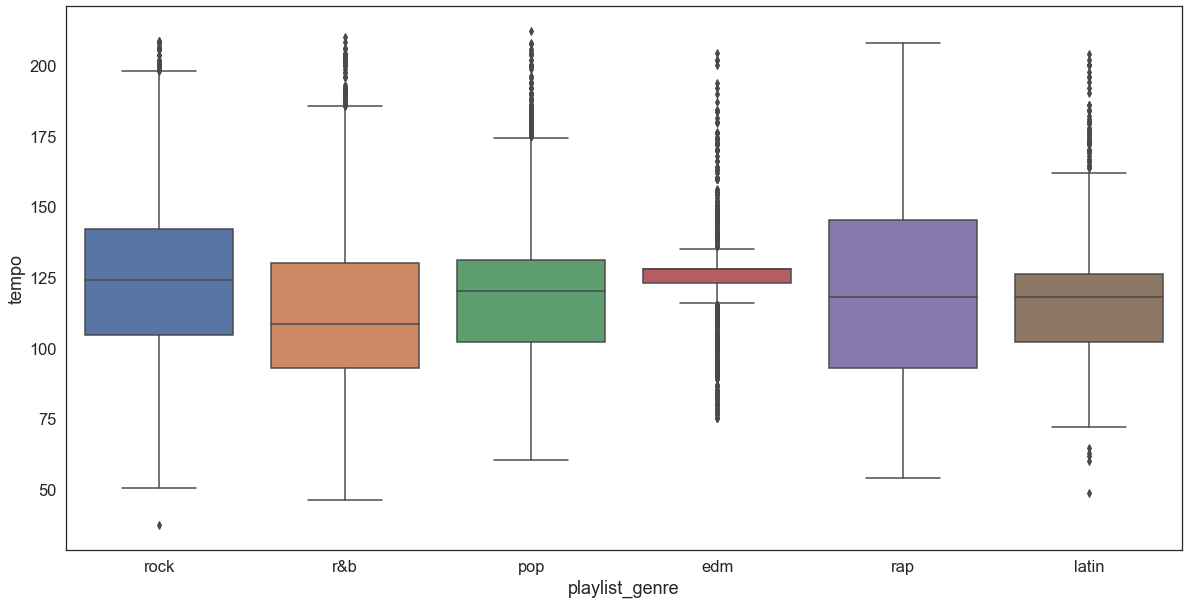

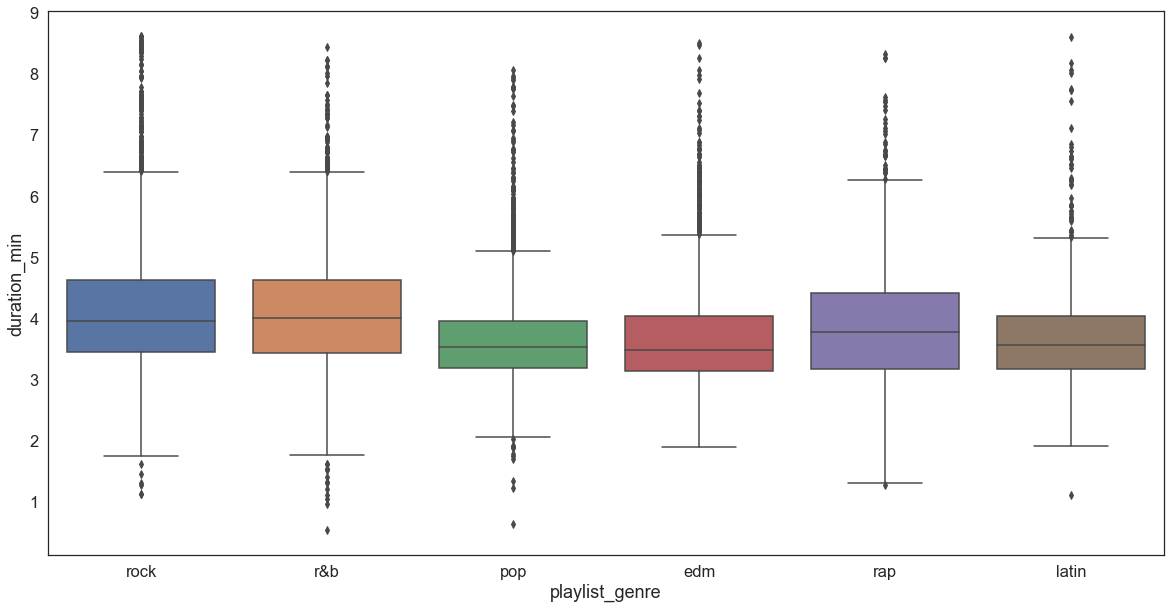

In [39]:
for i in parameter:
    plt.figure(figsize=(20,10))
    sns.boxplot(x='playlist_genre', y=i, data=spotify_en)

1. playlist_genre & track_popularity:In general, the distribution of 6 genres are positively skewed. Pop music gained the most popularity, followed by rap and latin music.
2. playlist_genre & danceability: The distribution of each genre in terms of danceability is relatively concentrated and rap has the highest danceability among them. In addition, all the genres have many outliers.
3. playlist_genre & energy: The distribution of rock music is the most scattered while that of edm is just the opposite. Rock music has the least outliers.
4. playlist_genre & key: The distribution of rock, pop and edm are similar to each other, and that of rap music is relatively scattered.
5. playlist_genre & loudness: The distribution of each genre in terms of danceability is relatively concentrated and that of edm is the most concentrated and highest.
6. playlist_genre & mode: We cannot draw informative information from this chart since discrete variables are not suitable for box plot.
7. playlist_genre & speechinese: Apart from rap and R&B, the distribution of other genres is concentrated, and rap has the highest speechinese.
8. playlist_genre & acousticness: Basically, the distribution of 6 genres are negatively skewed, and that of R&B is the most scattered and that of edm is the most concentrated. 
9. playlist_genre & instrumentalness: Only edm and rock has instrumentalism and both of them are pretty low.
10. playlist_genre & liveness: In general, the range of liveness of each genre is from 0.1 to 0.3 and their distributions are positively skewed.
11. playlist_genre & valence: Apart from edm(ranging from 0.2 to 0.6), other genres' distributions are quite comparable.
12. playlist_genre & tempo: Compared with other genres, the distribution of edm is centralized (around 125), with multiple outliers.
13. playlist_genre & duration: The durations of rock, r&b and rap are similar, ranging from 1.67 to 6.67 minutes while that of others are relatively smaller.

<a id='3.5'></a>
### 3.5 Q5 Who are the most popular artists among 18,000 songs on Spotify?

#### 3.5.1 Top 10 artists by song volume

Text(0.5, 1.0, 'Top 10 artists by song volume')

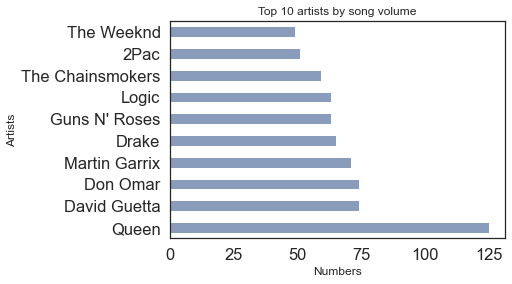

In [40]:
# Top 10 artists by song volume
df['track_artist'].value_counts().head(10).plot(kind='barh', color='#8A9CBC')
plt.xlabel('Numbers', fontsize = 12)
plt.ylabel('Artists', fontsize = 12)
plt.title('Top 10 artists by song volume', fontsize = 12)

#### 3.5.2 Top 10 artists by total song popularity

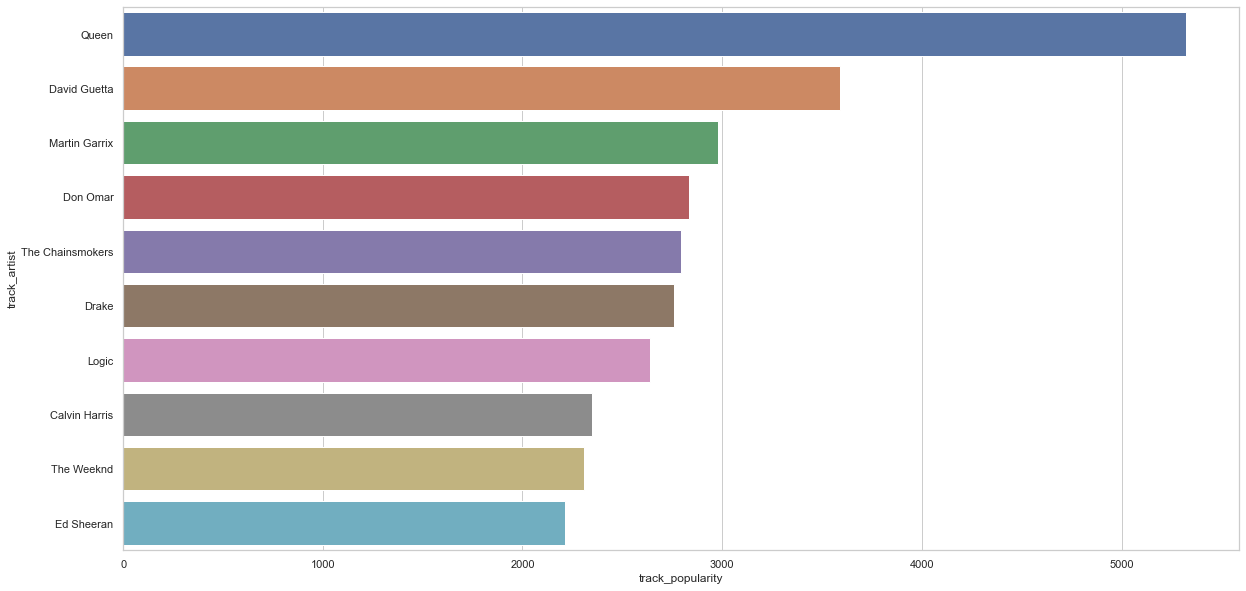

In [41]:
# Top 10 artists with total song popularity
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
x = df.groupby('track_artist')['track_popularity'].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x,x.index)

<a id='3.6'></a>
### 3.6 Q6 Can features be used to predict the popularity of music?

#### 3.6.1 Data preprocessing

#### Create Copy Document

In [70]:
df_copy = df.copy()
df_copy.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_min', 'language'],
      dtype='object')

#### Dropping the Uninformative Columns

In [71]:
df_copy = df_copy.drop(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_subgenre', 'duration_min', 'language'], axis=1)
df_copy.tail(10)

track_popularity playlist_genre  danceability  energy  key  loudness  \
18444                 0          latin         0.799   0.605    7   -10.011   
18445                57          latin         0.715   0.745    9    -6.265   
18446                43            edm         0.637   0.940    2    -5.494   
18447                64           rock         0.425   0.504    9   -10.003   
18448                72            r&b         0.744   0.715    0    -6.103   
18449                 0            edm         0.479   0.800   10    -5.778   
18450                49            pop         0.963   0.603    2    -6.224   
18451                40            r&b         0.458   0.540    5    -6.457   
18452                36            r&b         0.832   0.666    1    -4.920   
18453                61           rock         0.664   0.537    2    -6.000   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
18444     1       0.2860       0.00845          0.014300    0.4850   0.3680   
18445     0       0.1870       0.19200          0.000011    0.0807   0.8020   
18446     1       0.0502       0.12600          0.865000    0.1870   0.0896   
18447     1       0.0314       0.02200          0.000004    0.3630   0.4030   
18448     1       0.3510       0.10100          0.000000    0.0919   0.3400   
18449     0       0.0878       0.00555          0.000000    0.3350   0.2110   
18450     1       0.1800       0.06730          0.000006    0.2140   0.6470   
18451     0       0.0270       0.71500          0.000428    0.1150   0.6570   
18452     0       0.0633       0.14300          0.000000    0.0720   0.8100   
18453     1       0.0290       0.21700          0.000003    0.1180   0.2210   

         tempo  
18444  194.055  
18445  191.985  
18446  107.056  
18447  165.818  
18448  154.962  
18449  128.012  
18450  129.990  
18451  142.218  
18452  109.536  
18453  115.049

#### One-hot Encoding 

In [72]:
one_hot_encoded = pd.get_dummies(df_copy['playlist_genre'],prefix='playlist_genre')
display(one_hot_encoded)
df_copy = df_copy.join(one_hot_encoded)
df_copy = df_copy.drop(['playlist_genre'], axis=1)
one_hot_encoded = pd.get_dummies(df_copy['key'],prefix='key')
display(one_hot_encoded)
df_copy = df_copy.join(one_hot_encoded)
df_copy = df_copy.drop(['key'], axis=1)
df_copy.head(5)

playlist_genre_edm  playlist_genre_latin  playlist_genre_pop  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   0   
3                       0                     0                   0   
4                       0                     0                   1   
...                   ...                   ...                 ...   
18449                   1                     0                   0   
18450                   0                     0                   1   
18451                   0                     0                   0   
18452                   0                     0                   0   
18453                   0                     0                   0   

       playlist_genre_r&b  playlist_genre_rap  playlist_genre_rock  
0                       0                   0                    1  
1                       0                   0                    1  
2                       1                   0                    0  
3                       1                   0                    0  
4                       0                   0                    0  
...                   ...                 ...                  ...  
18449                   0                   0                    0  
18450                   0                   0                    0  
18451                   1                   0                    0  
18452                   1                   0                    0  
18453                   0                   0                    1  

[18454 rows x 6 columns]

key_0  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  \
0          0      0      1      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      1   
2          0      0      0      0      0      0      1      0      0      0   
3          0      0      0      0      0      1      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      1   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
18449      0      0      0      0      0      0      0      0      0      0   
18450      0      0      1      0      0      0      0      0      0      0   
18451      0      0      0      0      0      1      0      0      0      0   
18452      0      1      0      0      0      0      0      0      0      0   
18453      0      0      1      0      0      0      0      0      0      0   

       key_10  key_11  
0           0       0  
1           0       0  
2           0       0  
3           0       0  
4           0       0  
...       ...     ...  
18449       1       0  
18450       0       0  
18451       0       0  
18452       0       0  
18453       0       0  

[18454 rows x 12 columns]

track_popularity  danceability  energy  loudness  mode  speechiness  \
0                41         0.682   0.401   -10.068     1       0.0236   
1                28         0.303   0.880    -4.739     1       0.0442   
2                 0         0.845   0.652    -7.504     0       0.2160   
3                41         0.425   0.378    -5.819     0       0.0341   
4                65         0.760   0.887    -1.993     1       0.0409   

   acousticness  instrumentalness  liveness  valence  ...  key_2  key_3  \
0       0.27900           0.01170    0.0887    0.566  ...      1      0   
1       0.01170           0.00994    0.3470    0.404  ...      0      0   
2       0.00432           0.00723    0.4890    0.650  ...      0      0   
3       0.68900           0.00000    0.0664    0.405  ...      0      0   
4       0.03700           0.00000    0.1380    0.240  ...      0      0   

   key_4  key_5  key_6  key_7  key_8  key_9  key_10  key_11  
0      0      0      0      0      0      0       0       0  
1      0      0      0      0      0      1       0       0  
2      0      0      1      0      0      0       0       0  
3      0      1      0      0      0      0       0       0  
4      0      0      0      0      0      1       0       0  

[5 rows x 29 columns]

#### Z-score Normalization

In [73]:
# Z-score normalization
z_score_scaler  = preprocessing.StandardScaler()
df_copy_scale_z_score = z_score_scaler.fit_transform(df_copy.loc[:, df_copy.columns != 'track_popularity'])
df_copy_scale_z_score = pd.DataFrame(df_copy_scale_z_score,columns = df_copy.columns[df_copy.columns != 'track_popularity'])
df_copy = df_copy[['track_popularity']].join(df_copy_scale_z_score)
df_copy.head()

track_popularity  danceability    energy  loudness      mode  speechiness  \
0                41      0.252779 -1.612626 -1.129478  0.850047    -0.807439   
1                28     -2.272760  1.039196  0.695098  0.850047    -0.606048   
2                 0      1.338961 -0.223049 -0.251600 -1.176405     1.073519   
3                41     -1.459790 -1.739958  0.325321 -1.176405    -0.704788   
4                65      0.772547  1.077949  1.635291  0.850047    -0.638310   

   acousticness  instrumentalness  liveness   valence  ...     key_2  \
0      0.475927         -0.234851 -0.656229  0.198512  ...  3.193402   
1     -0.751409         -0.245311  1.023809 -0.509808  ... -0.313146   
2     -0.785295         -0.261417  1.947406  0.565789  ... -0.313146   
3      2.358484         -0.304386 -0.801273 -0.505436  ... -0.313146   
4     -0.635241         -0.304386 -0.335571 -1.226873  ... -0.313146   

      key_3     key_4     key_5     key_6     key_7     key_8     key_9  \
0 -0.168417 -0.271627 -0.299493 -0.288836 -0.335397 -0.281616 -0.323164   
1 -0.168417 -0.271627 -0.299493 -0.288836 -0.335397 -0.281616  3.094408   
2 -0.168417 -0.271627 -0.299493  3.462171 -0.335397 -0.281616 -0.323164   
3 -0.168417 -0.271627  3.338979 -0.288836 -0.335397 -0.281616 -0.323164   
4 -0.168417 -0.271627 -0.299493 -0.288836 -0.335397 -0.281616  3.094408   

     key_10   key_11  
0 -0.271512 -0.31231  
1 -0.271512 -0.31231  
2 -0.271512 -0.31231  
3 -0.271512 -0.31231  
4 -0.271512 -0.31231  

[5 rows x 29 columns]

#### 3.6.2 Predicting Model Building and Evaluation

#### Splitting the Training Data

In [46]:
x = df_copy.drop(['track_popularity'], axis=1).values
y = df_copy['track_popularity'].values

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

#### Perceptron Model

In [48]:
ppn = Perceptron(max_iter=400)
ppn.fit(x_train, y_train)
y_pred = ppn.predict(x_test)
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output)
print('Accuracy for Perceptron is ',metrics.accuracy_score(y_test, y_pred))

      Actual  Predicted
0         31          0
1         41          6
2         39         38
3         35          1
4         76         71
...      ...        ...
3686      11         35
3687      57         73
3688      60         28
3689      55          0
3690       9         48

[3691 rows x 2 columns]
Accuracy for Perceptron is  0.024112706583581684


#### Random Forest Model

In [49]:
rf_classifier =  RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output)
print('Accuracy for Random Forest is ',metrics.accuracy_score(y_test, y_pred))

      Actual  Predicted
0         31          0
1         41          0
2         39          3
3         35         38
4         76          0
...      ...        ...
3686      11         61
3687      57         77
3688      60          0
3689      55         28
3690       9         57

[3691 rows x 2 columns]
Accuracy for Random Forest is  0.06556488756434571


#### Linear Regression Model

In [50]:
linr = LinearRegression() 
linr.fit(x_train, y_train) 
y_pred = linr.predict(x_test)
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

      Actual  Predicted
0         31  39.304274
1         41  46.671462
2         39  44.909743
3         35  41.412673
4         76  51.963454
...      ...        ...
3686      11  46.769118
3687      57  52.330641
3688      60  35.366774
3689      55  29.612868
3690       9  45.062087

[3691 rows x 2 columns]
Mean Absolute Error: 20.087027628095633
Mean Squared Error: 571.6146552960932
Root Mean Squared Error: 23.908464093205428


We notice that the prediction accuracy of these models are not ideal. Considering the popularity of 0-100, we use the linear regression model for prediction. The results show that the MAE / MSE / RMSE values of the linear regression model are large and very optimistic. Therefore, we further deal with the data.

We realize that the difficulty of prediction may be that the popularity is an integer value of 0-100. Therefore, we classify the popularity into three levels: "low", "medium" and "high"

In [74]:
df_copy['track_popularity'] = pd.cut(df_copy['track_popularity'],bins=3,labels = ['low','medium','high'], right = True)

In [75]:
x = df_copy.drop(['track_popularity'], axis=1).values
y = df_copy['track_popularity'].values

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

#### Perceptron Model

In [54]:
ppn = Perceptron(max_iter=400)
ppn.fit(x_train, y_train)
y_pred = ppn.predict(x_test)
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output)
print('Accuracy for Perceptron is ',metrics.accuracy_score(y_test, y_pred))

      Actual Predicted
0        low    medium
1     medium    medium
2     medium    medium
3     medium       low
4       high      high
...      ...       ...
5532    high       low
5533     low    medium
5534     low       low
5535    high    medium
5536    high      high

[5537 rows x 2 columns]
Accuracy for Perceptron is  0.40653783637348745


Obviously, the accuracy has been greatly improved. Although it is still not very high, it may be caused by other factors. Therefore, we will then test different models

#### Logistic Regression Model

In [55]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_test, y_pred))

      Actual Predicted
0        low    medium
1     medium    medium
2     medium    medium
3     medium    medium
4       high    medium
...      ...       ...
5532    high    medium
5533     low    medium
5534     low    medium
5535    high    medium
5536    high    medium

[5537 rows x 2 columns]
The accuracy of the Logistic Regression is 0.515802781289507


#### Support Vector Machine

In [56]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output)
print('The accuracy of the Support Vector Machine is',metrics.accuracy_score(y_test, y_pred))

      Actual Predicted
0        low    medium
1     medium    medium
2     medium    medium
3     medium    medium
4       high    medium
...      ...       ...
5532    high    medium
5533     low       low
5534     low    medium
5535    high    medium
5536    high    medium

[5537 rows x 2 columns]
The accuracy of the Support Vector Machine is 0.5138161459273975


#### Decision Tree

In [57]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_test)
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(y_test, y_pred))

      Actual Predicted
0        low    medium
1     medium       low
2     medium       low
3     medium       low
4       high    medium
...      ...       ...
5532    high      high
5533     low       low
5534     low    medium
5535    high      high
5536    high       low

[5537 rows x 2 columns]
The accuracy of the Decision Tree is 0.4199024742640419


#### Random Forest

In [80]:
rf_classifier =  RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output)
print('The accuracy of the Random Forest is',rf_classifier.score(x_train, y_train))
print('The accuracy of the Random Forest is',rf_classifier.score(x_test, y_test))

      Actual Predicted
0        low    medium
1     medium    medium
2     medium    medium
3     medium    medium
4       high    medium
...      ...       ...
5532    high    medium
5533     low       low
5534     low    medium
5535    high    medium
5536    high       low

[5537 rows x 2 columns]
The accuracy of the Random Forest is 0.9899357435937137
The accuracy of the Random Forest is 0.5226657034495213


#### KNN

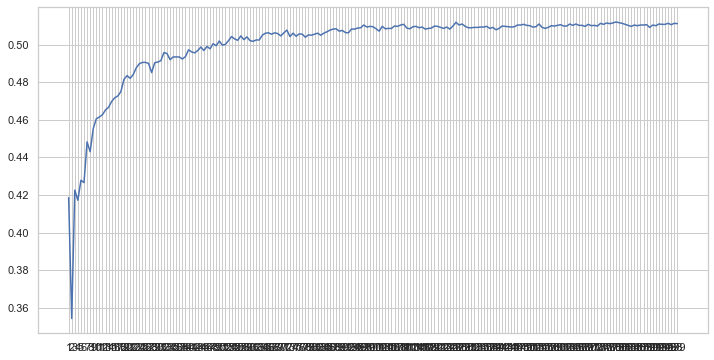

Accuracies for different values of k are: [0.41863825 0.35434351 0.42261152 0.41719343 0.42784902 0.42658479
 0.44825718 0.44301969 0.4553007  0.4605382  0.46144121 0.46270544
 0.46523388 0.46667871 0.46974896 0.4717356  0.47263861 0.47498645
 0.48148817 0.48347481 0.48202998 0.48401662 0.48762868 0.48979592
 0.49051833 0.49051833 0.48997652 0.48510023 0.49033773 0.49069893
 0.49142135 0.49575582 0.49521401 0.49196316 0.49340798 0.49340798
 0.49340798 0.49232436 0.49358859 0.49720065 0.49611703 0.49557522
 0.49683944 0.49864548 0.49683944 0.49900668 0.49774246 0.50045151
 0.49936789 0.50189633 0.4997291  0.5000903  0.50207694 0.50424418
 0.50297995 0.50225754 0.50460538 0.50261875 0.50406357 0.50207694
 0.50171573 0.50243814 0.50243814 0.50496659 0.50605021 0.50623081
 0.5055084  0.50623081 0.5058696  0.50460538 0.50623081 0.50767564
 0.50424418 0.50605021 0.50442478 0.505689   0.5055084  0.50388297
 0.50514719 0.50496659 0.5055084  0.50605021 0.50496659 0.50605021
 0.50677262 0.507675

In [59]:
a_index=list(range(1,200))
a=pd.Series(dtype='float64')
x=list(range(1,200))
for i in list(range(1,200)):
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test) 
    a=a.append(pd.Series(metrics.accuracy_score(y_test, y_pred)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of k are:',a.values,'with the max value as ',a.values.max())

#### Gaussian Naive Bayes

In [60]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred=gnb.predict(x_test)
output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(output)
print('The accuracy of the Gaussian Naive Bayes is',metrics.accuracy_score(y_test, y_pred))

      Actual Predicted
0        low       low
1     medium      high
2     medium    medium
3     medium       low
4       high      high
...      ...       ...
5532    high    medium
5533     low       low
5534     low      high
5535    high      high
5536    high      high

[5537 rows x 2 columns]
The accuracy of the Gaussian Naive Bayes is 0.38486545060502075


#### 3.6.3 Evaluate models by 10-fold cross validation

In [61]:
x = df_copy.drop(['track_popularity'], axis=1).values
y = df_copy['track_popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)
mean=[]
accuracy=[]
classifiers=['Perceptron','SVC','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[Perceptron(max_iter=400),SVC(),LogisticRegression(),KNeighborsClassifier(n_neighbors=10),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,x,y, scoring='accuracy', cv = 10)
    cv_result=cv_result
    mean.append(cv_result.mean())
    accuracy.append(cv_result)
rank = pd.DataFrame({'CV Mean':mean},index=classifiers)       
rank.sort_values(by='CV Mean', ascending=False)

CV Mean
Random Forest        0.522326
Logistic Regression  0.518262
SVC                  0.516203
KNN                  0.462284
Decision Tree        0.422779
Perceptron           0.406740
Naive Bayes          0.380080

<AxesSubplot:>

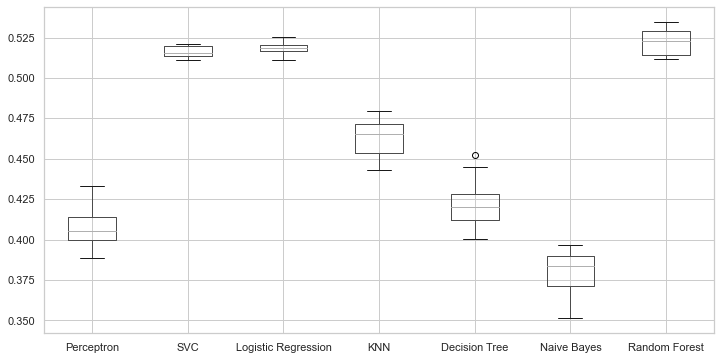

In [62]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=classifiers)
box.T.boxplot()

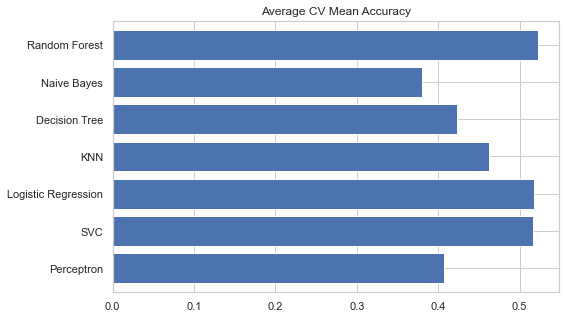

In [63]:
rank['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

We can see that the random forest / logistic regression / support vector machine has a high average cross validation accuracy. It has reached more than 50%, but this is based on our classification of popularity into "low", "medium" and "high", which greatly reduces the difficulty. For discrete values from 0 to 100, the accuracy of our model prediction is not ideal. If we estimate and predict the popularity of music in business, it is obviously lacking. At the same time, we also reflect on the reasons for the low accuracy, whether the characteristics of music have a certain impact on the popularity of music, the number and popularity of musicians, and whether the signed record companies have a deeper impact on the popularity? This is also the part that we will further improve and study.study.

<a id='4'></a>
## 4. Conclusion

- First of all, we can be sure that the loudness, genre, energy, liveness and other parameters of music have a certain impact on the popularity of music, showing a certain linear relationship. Through the thermal diagram, we find that there is a high correlation between dance ability, energy, acoustics and popularity
- Secondly, there is a certain correlation between the characteristics of music itself. For example, there is a certain positive correlation between energy, loudness and acoustics
- Through the analysis of the lyrics of TOP500 songs by TF, we analyzed the lyrics that frequently appear in the songs with high popularity. We found that God, telephone, lady and love are the words that often appear in the songs, and analyzed them through LDA theme modeling. However, it seems that the theme of the song is not obvious, which may be caused by the random and abstract lyrics of the song
- We also analyzed different types of music and found that pop music is the most popular. In addition, different music types have different music attributes. For example, rock music has stronger energy, while rap's speech Chinese is the highest and R & B's dance ability is higher
- For the prediction of song popularity, we find that the discrete values predicted by the model are unreliable, so we classify the popularity, which improves the accuracy. However, we also realize that the attributes of music itself do not seem to be the determinant of popularity, because the popularity of music also involves the influence of subjective factors of listeners and the influence of singers, record companies and so on